In [1]:
# 시각화 관련 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import re

import warnings;warnings.filterwarnings('ignore')

# Modelconda info --envs

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

pd.set_option('display.max_columns', None)  # 모든 컬럼을 표시
pd.set_option('display.width', 800)        # 출력 창의 너비 설정

In [5]:
df = pd.read_csv('/data/ephemeral/home/data/final_data_2.csv')

In [6]:
df

,Unnamed: 0,index,아파트명,전용면적,계약일,층_x,건축년도,도로명,target,주소,좌표X,좌표Y,is_test,station_area_0.0,station_area_1.0,실거래가격지수,면적구간,mean_price,최대층수,지하철거리,구,동,계약년,계약월,아파트,도로,강남여부,신축여부,타겟_평균(동),타겟_면적당_비율(동),타겟_평균(구),타겟_면적당_비율(구)
0,0,0,개포6차우성,79.97,8,3,1987,언주로 3,124000.0,서울특별시 강남구 개포동언주로 3,127.055926,37.476792,0,True,False,100.509309,3,84221.72770,5,1146.684379,강남구,개포동,2017,12,우성,언주로,1,0,94137.690121,1619.672852,115510.603705,1348.908249
1,1,1,개포6차우성,79.97,22,4,1987,언주로 3,123500.0,서울특별시 강남구 개포동언주로 3,127.055926,37.476792,0,True,False,100.509309,3,84221.72770,5,1146.684379,강남구,개포동,2017,12,우성,언주로,1,0,94137.690121,1619.672852,115510.603705,1348.908249
2,2,2,개포6차우성,54.98,28,5,1987,언주로 3,91500.0,서울특별시 강남구 개포동언주로 3,127.055926,37.476792,0,True,False,100.509309,2,86921.56087,5,1146.684379,강남구,개포동,2017,12,우성,언주로,1,0,94137.690121,1619.672852,115510.603705,1348.908249
3,3,3,개포6차우성,79.97,3,4,1987,언주로 3,130000.0,서울특별시 강남구 개포동언주로 3,127.055926,37.476792,0,True,False,102.018069,3,81495.96440,5,1146.684379,강남구,개포동,2018,1,우성,언주로,1,0,94137.690121,1619.672852,115510.603705,1348.908249
4,4,4,개포6차우성,79.97,8,2,1987,언주로 3,117000.0,서울특별시 강남구 개포동언주로 3,127.055926,37.476792,0,True,False,102.018069,3,81495.96440,5,1146.684379,강남구,개포동,2018,1,우성,언주로,1,0,94137.690121,1619.672852,115510.603705,1348.908249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101124,1101124,1128089,신내우디안1단지,84.65,19,13,2014,신내역로1길 85,NaN,서울특별시 중랑구 신내동신내역로1길 85,127.106294,37.616809,1,True,False,149.558671,3,142245.25160,24,513.411363,중랑구,신내동,2023,7,우디안,신내역로,0,1,32589.367973,473.226446,35181.255378,496.900289
1101125,1101125,1128090,신내우디안1단지,84.62,25,12,2014,신내역로1길 85,NaN,서울특별시 중랑구 신내동신내역로1길 85,127.106294,37.616809,1,True,False,149.558671,3,142245.25160,24,513.411363,중랑구,신내동,2023,7,우디안,신내역로,0,1,32589.367973,473.226446,35181.255378,496.900289
1101126,1101126,1128091,신내우디안1단지,101.65,27,12,2014,신내역로1길 85,NaN,서울특별시 중랑구 신내동신내역로1길 85,127.106294,37.616809,1,True,False,151.239970,4,150760.99940,24,513.411363,중랑구,신내동,2023,8,우디안,신내역로,0,1,32589.367973,473.226446,35181.255378,496.900289
1101127,1101127,1128092,신내우디안1단지,84.94,2,18,2014,신내역로1길 85,NaN,서울특별시 중랑구 신내동신내역로1길 85,127.106294,37.616809,1,True,False,152.163334,3,141016.70400,24,513.411363,중랑구,신내동,2023,9,우디안,신내역로,0,1,32589.367973,473.226446,35181.255378,496.900289


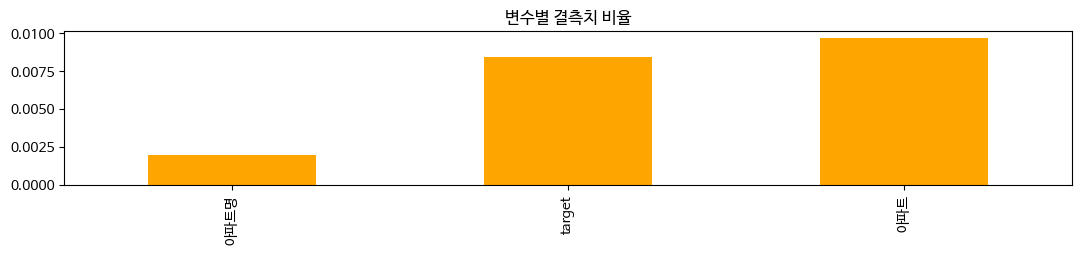

In [7]:
fig = plt.figure(figsize=(13, 2))
missing = df.isnull().sum() / df.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

- target과 test 분류
- 아파트 제거
- 모델 돌리기

In [8]:
print(df.columns)

Index(['Unnamed: 0', 'index', '아파트명', '전용면적', '계약일', '층_x', '건축년도', '도로명', 'target', '주소', '좌표X', '좌표Y', 'is_test', 'station_area_0.0', 'station_area_1.0', '실거래가격지수', '면적구간', 'mean_price', '최대층수', '지하철거리', '구', '동', '계약년', '계약월', '아파트', '도로', '강남여부', '신축여부', '타겟_평균(동)', '타겟_면적당_비율(동)', '타겟_평균(구)', '타겟_면적당_비율(구)'], dtype='object')


In [10]:
df.drop(columns='Unnamed: 0', inplace=True)

In [11]:
df = df.drop('아파트', axis=1)

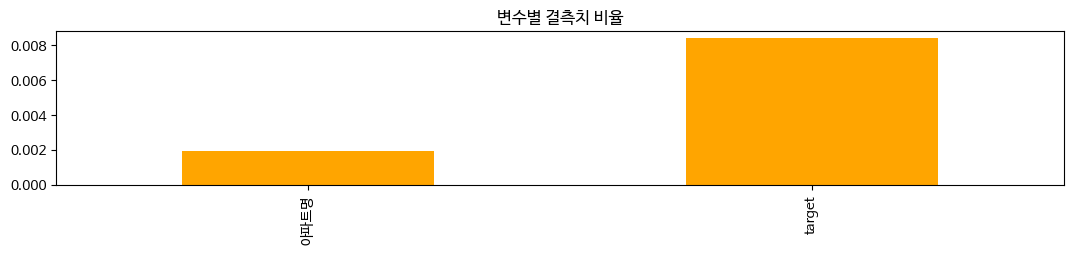

In [12]:
fig = plt.figure(figsize=(13, 2))
missing = df.isnull().sum() / df.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

In [13]:
df['is_test'].value_counts()

0    1091857
1       9272
Name: is_test, dtype: int64

In [14]:
df[['아파트명', '도로명', '주소', '구', '동', '도로']] = df[['아파트명', '도로명', '주소', '구', '동', '도로']].astype(str)

In [12]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from catboost import CatBoostRegressor
from tqdm import tqdm

def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

output_df = pd.DataFrame()
test_score = []

for gu in df['구'].value_counts().keys():
    print(gu)
    concat_select_gu = df[df['구'] == gu]
    print(concat_select_gu.shape)
    dt_train = concat_select_gu.query('is_test == 0')
    dt_test = concat_select_gu.query('is_test == 1')

    # Drop the 'is_test' column
    dt_train.drop(['is_test'], axis=1, inplace=True)
    dt_test.drop(['is_test'], axis=1, inplace=True)
    dt_test['target'] = 0

    label_encoders = {}
    continuous_columns_v2 = []
    categorical_columns_v2 = []

    for column in dt_train.columns:
        if pd.api.types.is_numeric_dtype(dt_train[column]):
            continuous_columns_v2.append(column)
        else:
            categorical_columns_v2.append(column)

    for col in tqdm(categorical_columns_v2):
        lbl = LabelEncoder()
        lbl.fit(dt_train[col].astype(str))
        dt_train[col] = lbl.transform(dt_train[col].astype(str))
        label_encoders[col] = lbl

        for label in np.unique(dt_test[col]):
            if label not in lbl.classes_:
                lbl.classes_ = np.append(lbl.classes_, label)

        dt_test[col] = lbl.transform(dt_test[col].astype(str))

    assert dt_train.shape[1] == dt_test.shape[1]

    y_train = dt_train['target']
    X_train = dt_train.drop(['target'], axis=1)
    # Split data for training and validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

    # Initialize and train RandomForest model with best hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='auto',
        random_state=1,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_val)

    # Initialize and train CatBoost model
    cb_model = CatBoostRegressor(
        iterations=700,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        random_state=1,
        verbose=100
    )
    cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=False)
    cb_pred = cb_model.predict(X_val)

    # Calculate RMSE for both models
    rf_rmse = np.sqrt(metrics.mean_squared_error(y_val, rf_pred))
    cb_rmse = np.sqrt(metrics.mean_squared_error(y_val, cb_pred))
    test_score.append((gu, rf_rmse, cb_rmse))

    # Save both models
    with open('saved_rf_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    
    with open('saved_cb_model.pkl', 'wb') as f:
        pickle.dump(cb_model, f)

    # Load models
    with open('saved_rf_model.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    
    with open('saved_cb_model.pkl', 'rb') as f:
        cb_model = pickle.load(f)

    # Drop 'target' and 'index' columns before prediction
    X_test = dt_test.drop(columns=['target', 'index'], errors='ignore')

    # Ensure columns match between train and test
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # Align columns with training data

    # Make predictions with both models
    rf_test_pred = rf_model.predict(X_test)
    cb_test_pred = cb_model.predict(X_test)

    # Average the predictions from both models
    final_pred = (rf_test_pred + cb_test_pred) / 2

    # Prepare the results
    preds_df = pd.DataFrame(final_pred.astype(int), columns=["target"])
    preds_df_gu = pd.concat([dt_test['index'].reset_index(drop=True), preds_df], axis=1)
    
    output_df = pd.concat([output_df, preds_df_gu])

# Sort and save the output dataframe with only the target column
output_df.sort_values('index').drop('index', axis=1).to_csv('7월19일_앙상블_하이퍼파라미터튜닝.csv', index=False)
print(test_score)


노원구
(114864, 26)


100%|██████████| 6/6 [00:00<00:00, 44.59it/s]


0:	learn: 16011.3406090	test: 16257.0434546	best: 16257.0434546 (0)	total: 11.3ms	remaining: 7.93s
100:	learn: 2406.6182539	test: 2501.7811585	best: 2501.7811585 (100)	total: 1.01s	remaining: 6.02s
200:	learn: 1997.2700702	test: 2202.1216303	best: 2202.1216303 (200)	total: 2.01s	remaining: 4.98s
300:	learn: 1824.2377998	test: 2116.8050791	best: 2116.8050791 (300)	total: 2.98s	remaining: 3.95s
400:	learn: 1713.9816576	test: 2079.4899132	best: 2079.4899132 (400)	total: 3.99s	remaining: 2.97s
500:	learn: 1627.0925576	test: 2057.7910231	best: 2057.6607196 (499)	total: 5s	remaining: 1.98s
600:	learn: 1557.0972643	test: 2045.0401075	best: 2044.9284960 (598)	total: 5.98s	remaining: 986ms
699:	learn: 1495.4228447	test: 2039.2644260	best: 2039.1081793 (697)	total: 6.98s	remaining: 0us

bestTest = 2039.108179
bestIteration = 697

Shrink model to first 698 iterations.
송파구
(72102, 26)


100%|██████████| 6/6 [00:00<00:00, 81.77it/s]


0:	learn: 43937.1542770	test: 43768.0802855	best: 43768.0802855 (0)	total: 10.2ms	remaining: 7.14s
100:	learn: 6593.8854651	test: 7159.2535975	best: 7159.2535975 (100)	total: 868ms	remaining: 5.15s
200:	learn: 5432.2235605	test: 6320.1927312	best: 6320.1927312 (200)	total: 1.71s	remaining: 4.24s
300:	learn: 4826.4920874	test: 6012.9535377	best: 6012.9535377 (300)	total: 2.54s	remaining: 3.37s
400:	learn: 4436.5458852	test: 5889.7626108	best: 5888.8953600 (398)	total: 3.38s	remaining: 2.52s
500:	learn: 4157.0464639	test: 5817.2622321	best: 5817.2622321 (500)	total: 4.23s	remaining: 1.68s
600:	learn: 3923.5190842	test: 5767.8580322	best: 5767.8580322 (600)	total: 5.09s	remaining: 839ms
699:	learn: 3731.5026329	test: 5737.5283358	best: 5736.9712347 (695)	total: 5.93s	remaining: 0us

bestTest = 5736.971235
bestIteration = 695

Shrink model to first 696 iterations.
강남구
(65941, 26)


100%|██████████| 6/6 [00:00<00:00, 85.00it/s]


0:	learn: 73449.2865201	test: 74428.8984998	best: 74428.8984998 (0)	total: 10.9ms	remaining: 7.63s
100:	learn: 12808.7636451	test: 15020.3589822	best: 15020.3589822 (100)	total: 828ms	remaining: 4.91s
200:	learn: 10229.7598986	test: 13387.1662857	best: 13387.1662857 (200)	total: 1.68s	remaining: 4.16s
300:	learn: 8996.4786052	test: 12797.1888369	best: 12797.1888369 (300)	total: 2.52s	remaining: 3.34s
400:	learn: 8186.2140945	test: 12527.2973641	best: 12527.2973641 (400)	total: 3.33s	remaining: 2.49s
500:	learn: 7543.1624168	test: 12322.6646237	best: 12322.6646237 (500)	total: 4.16s	remaining: 1.65s
600:	learn: 7074.8097755	test: 12226.6982932	best: 12224.9753278 (599)	total: 5s	remaining: 824ms
699:	learn: 6673.1160293	test: 12133.7404527	best: 12133.7404527 (699)	total: 5.83s	remaining: 0us

bestTest = 12133.74045
bestIteration = 699

강서구
(65192, 26)


100%|██████████| 6/6 [00:00<00:00, 86.41it/s]


0:	learn: 22128.3452618	test: 21708.4753077	best: 21708.4753077 (0)	total: 10.6ms	remaining: 7.43s
100:	learn: 3244.1483303	test: 3576.8493435	best: 3576.8493435 (100)	total: 828ms	remaining: 4.91s
200:	learn: 2643.2363965	test: 3167.8258681	best: 3167.7109341 (199)	total: 1.64s	remaining: 4.07s
300:	learn: 2363.3790216	test: 3037.4393266	best: 3037.4393266 (300)	total: 2.45s	remaining: 3.25s
400:	learn: 2180.2312898	test: 2987.8557112	best: 2987.8557112 (400)	total: 3.3s	remaining: 2.46s
500:	learn: 2035.8894274	test: 2953.9793007	best: 2953.9793007 (500)	total: 4.13s	remaining: 1.64s
600:	learn: 1921.3096770	test: 2930.1485282	best: 2930.1485282 (600)	total: 4.99s	remaining: 822ms
699:	learn: 1822.2554832	test: 2918.1865645	best: 2917.9397903 (698)	total: 5.8s	remaining: 0us

bestTest = 2917.93979
bestIteration = 698

Shrink model to first 699 iterations.
구로구
(57612, 26)


100%|██████████| 6/6 [00:00<00:00, 93.14it/s]


0:	learn: 18311.6892977	test: 18408.0322466	best: 18408.0322466 (0)	total: 10.7ms	remaining: 7.45s
100:	learn: 2840.6348194	test: 3173.7909935	best: 3173.7909935 (100)	total: 839ms	remaining: 4.98s
200:	learn: 2255.8213411	test: 2736.0644513	best: 2736.0644513 (200)	total: 1.64s	remaining: 4.07s
300:	learn: 1997.1000078	test: 2598.2780716	best: 2598.2780716 (300)	total: 2.44s	remaining: 3.24s
400:	learn: 1837.1027356	test: 2537.5953138	best: 2537.5816772 (399)	total: 3.23s	remaining: 2.4s
500:	learn: 1710.6265282	test: 2500.3870359	best: 2500.3870359 (500)	total: 4.03s	remaining: 1.6s
600:	learn: 1602.7936979	test: 2475.9928652	best: 2475.8182823 (599)	total: 4.88s	remaining: 805ms
699:	learn: 1513.5161121	test: 2462.1960000	best: 2462.1960000 (699)	total: 5.69s	remaining: 0us

bestTest = 2462.196
bestIteration = 699

성북구
(56733, 26)


100%|██████████| 6/6 [00:00<00:00, 101.76it/s]


0:	learn: 18319.2817868	test: 18174.6603938	best: 18174.6603938 (0)	total: 9.91ms	remaining: 6.93s
100:	learn: 2799.8891173	test: 3137.2130748	best: 3137.2130748 (100)	total: 764ms	remaining: 4.53s
200:	learn: 2331.9090255	test: 2840.0450548	best: 2840.0450548 (200)	total: 1.51s	remaining: 3.76s
300:	learn: 2096.7746812	test: 2760.9167433	best: 2760.9167433 (300)	total: 2.3s	remaining: 3.04s
400:	learn: 1931.8327970	test: 2719.8888084	best: 2719.8888084 (400)	total: 3.06s	remaining: 2.28s
500:	learn: 1819.3852127	test: 2702.6843291	best: 2702.5012190 (499)	total: 3.8s	remaining: 1.51s
600:	learn: 1721.1042500	test: 2694.9348626	best: 2693.5232782 (582)	total: 4.55s	remaining: 750ms
699:	learn: 1633.0739316	test: 2689.9349676	best: 2688.7337455 (684)	total: 5.3s	remaining: 0us

bestTest = 2688.733746
bestIteration = 684

Shrink model to first 685 iterations.
양천구
(54106, 26)


100%|██████████| 6/6 [00:00<00:00, 101.55it/s]


0:	learn: 34647.9938580	test: 34817.3899186	best: 34817.3899186 (0)	total: 9.79ms	remaining: 6.84s
100:	learn: 4718.2154542	test: 5270.0077261	best: 5270.0077261 (100)	total: 789ms	remaining: 4.68s
200:	learn: 3702.2942058	test: 4563.8849880	best: 4563.8849880 (200)	total: 1.58s	remaining: 3.93s
300:	learn: 3252.2875608	test: 4354.2756848	best: 4354.2756848 (300)	total: 2.36s	remaining: 3.13s
400:	learn: 2955.1201310	test: 4277.6165035	best: 4277.6165035 (400)	total: 3.14s	remaining: 2.34s
500:	learn: 2731.0724771	test: 4238.4267688	best: 4238.4254696 (499)	total: 3.93s	remaining: 1.56s
600:	learn: 2548.9580511	test: 4207.8710417	best: 4207.5515530 (599)	total: 4.72s	remaining: 778ms
699:	learn: 2408.2330092	test: 4192.2301820	best: 4190.7386142 (687)	total: 5.5s	remaining: 0us

bestTest = 4190.738614
bestIteration = 687

Shrink model to first 688 iterations.
강동구
(53467, 26)


100%|██████████| 6/6 [00:00<00:00, 102.37it/s]


0:	learn: 26302.1009017	test: 26397.4810431	best: 26397.4810431 (0)	total: 10.4ms	remaining: 7.28s
100:	learn: 3871.8725233	test: 4481.7171379	best: 4481.7171379 (100)	total: 794ms	remaining: 4.71s
200:	learn: 3143.3889304	test: 3985.5958767	best: 3985.5958767 (200)	total: 1.58s	remaining: 3.92s
300:	learn: 2762.3908379	test: 3812.3495358	best: 3812.3495358 (300)	total: 2.35s	remaining: 3.11s
400:	learn: 2517.2206160	test: 3725.8417560	best: 3725.8417560 (400)	total: 3.12s	remaining: 2.33s
500:	learn: 2335.4593400	test: 3683.9043187	best: 3683.9043187 (500)	total: 3.92s	remaining: 1.55s
600:	learn: 2179.9212724	test: 3647.0592906	best: 3646.5168083 (598)	total: 4.69s	remaining: 772ms
699:	learn: 2048.4339009	test: 3620.8228262	best: 3620.3923774 (698)	total: 5.46s	remaining: 0us

bestTest = 3620.392377
bestIteration = 698

Shrink model to first 699 iterations.
도봉구
(52800, 26)


100%|██████████| 6/6 [00:00<00:00, 112.93it/s]


0:	learn: 14547.7645425	test: 14663.2030825	best: 14663.2030825 (0)	total: 9.61ms	remaining: 6.72s
100:	learn: 2223.9028412	test: 2530.1847584	best: 2530.1847584 (100)	total: 781ms	remaining: 4.63s
200:	learn: 1855.7709946	test: 2321.3714251	best: 2321.3714251 (200)	total: 1.54s	remaining: 3.83s
300:	learn: 1676.6925060	test: 2260.9388061	best: 2260.9388061 (300)	total: 2.31s	remaining: 3.07s
400:	learn: 1560.2622077	test: 2231.5875855	best: 2231.5875855 (400)	total: 3.11s	remaining: 2.32s
500:	learn: 1467.4162784	test: 2219.9855636	best: 2219.9779249 (498)	total: 3.88s	remaining: 1.54s
600:	learn: 1383.3664324	test: 2216.5961597	best: 2216.3443494 (589)	total: 4.65s	remaining: 766ms
699:	learn: 1317.3513426	test: 2213.4381967	best: 2213.3504449 (694)	total: 5.41s	remaining: 0us

bestTest = 2213.350445
bestIteration = 694

Shrink model to first 695 iterations.
서초구
(48159, 26)


100%|██████████| 6/6 [00:00<00:00, 108.25it/s]


0:	learn: 66469.8842696	test: 68800.3536586	best: 68800.3536586 (0)	total: 10.4ms	remaining: 7.24s
100:	learn: 11230.4314952	test: 13052.5848500	best: 13052.5848500 (100)	total: 788ms	remaining: 4.67s
200:	learn: 8953.8115623	test: 11514.2779562	best: 11514.2779562 (200)	total: 1.57s	remaining: 3.89s
300:	learn: 7761.9913500	test: 10962.2128823	best: 10962.2128823 (300)	total: 2.3s	remaining: 3.05s
400:	learn: 6994.7704159	test: 10742.0388244	best: 10742.0388244 (400)	total: 3.06s	remaining: 2.28s
500:	learn: 6403.1232309	test: 10620.2153786	best: 10619.9482531 (499)	total: 3.81s	remaining: 1.51s
600:	learn: 5930.2510089	test: 10533.4858249	best: 10533.4858249 (600)	total: 4.57s	remaining: 753ms
699:	learn: 5564.0291004	test: 10493.1899995	best: 10493.1899995 (699)	total: 5.34s	remaining: 0us

bestTest = 10493.19
bestIteration = 699

영등포구
(47738, 26)


100%|██████████| 6/6 [00:00<00:00, 112.09it/s]


0:	learn: 34711.9241621	test: 34212.3632124	best: 34212.3632124 (0)	total: 10.7ms	remaining: 7.44s
100:	learn: 4754.4035845	test: 5417.9615168	best: 5417.9615168 (100)	total: 777ms	remaining: 4.61s
200:	learn: 3582.3179768	test: 4596.3667287	best: 4596.3667287 (200)	total: 1.55s	remaining: 3.84s
300:	learn: 3027.3984100	test: 4340.9783609	best: 4340.9783609 (300)	total: 2.33s	remaining: 3.1s
400:	learn: 2693.4929171	test: 4242.4535548	best: 4242.4535548 (400)	total: 3.1s	remaining: 2.31s
500:	learn: 2455.1070218	test: 4187.4728239	best: 4187.4728239 (500)	total: 3.87s	remaining: 1.54s
600:	learn: 2277.9635293	test: 4164.7468114	best: 4164.7468114 (600)	total: 4.65s	remaining: 766ms
699:	learn: 2121.3498017	test: 4142.1276543	best: 4142.1276543 (699)	total: 5.39s	remaining: 0us

bestTest = 4142.127654
bestIteration = 699

마포구
(40512, 26)


100%|██████████| 6/6 [00:00<00:00, 135.23it/s]


0:	learn: 32710.5118173	test: 32731.0619509	best: 32731.0619509 (0)	total: 9.37ms	remaining: 6.55s
100:	learn: 4946.1380942	test: 5517.8158225	best: 5517.8158225 (100)	total: 743ms	remaining: 4.4s
200:	learn: 3842.1161045	test: 4790.2896629	best: 4790.2896629 (200)	total: 1.48s	remaining: 3.67s
300:	learn: 3339.8115902	test: 4571.6735229	best: 4571.6735229 (300)	total: 2.21s	remaining: 2.93s
400:	learn: 2996.6976130	test: 4479.7106648	best: 4479.7106648 (400)	total: 2.96s	remaining: 2.21s
500:	learn: 2746.6864592	test: 4433.4311719	best: 4433.1781043 (490)	total: 3.7s	remaining: 1.47s
600:	learn: 2552.6343116	test: 4407.2050464	best: 4407.2050464 (600)	total: 4.45s	remaining: 733ms
699:	learn: 2384.0182195	test: 4384.2693904	best: 4384.2693904 (699)	total: 5.18s	remaining: 0us

bestTest = 4384.26939
bestIteration = 699

동작구
(40371, 26)


100%|██████████| 6/6 [00:00<00:00, 137.78it/s]


0:	learn: 27241.6156964	test: 26001.5354164	best: 26001.5354164 (0)	total: 8.86ms	remaining: 6.19s
100:	learn: 3999.2096014	test: 4308.8091000	best: 4308.8091000 (100)	total: 740ms	remaining: 4.38s
200:	learn: 3250.2320756	test: 3863.9025809	best: 3863.9025809 (200)	total: 1.46s	remaining: 3.62s
300:	learn: 2861.9063339	test: 3706.8352183	best: 3706.8352183 (300)	total: 2.2s	remaining: 2.92s
400:	learn: 2593.4992238	test: 3638.3503992	best: 3638.3503992 (400)	total: 2.94s	remaining: 2.19s
500:	learn: 2391.4859350	test: 3603.1289150	best: 3603.1289150 (500)	total: 3.68s	remaining: 1.46s
600:	learn: 2231.1006964	test: 3587.0300590	best: 3586.3723925 (590)	total: 4.41s	remaining: 727ms
699:	learn: 2092.8304206	test: 3573.4136248	best: 3573.4136248 (699)	total: 5.15s	remaining: 0us

bestTest = 3573.413625
bestIteration = 699

동대문구
(39955, 26)


100%|██████████| 6/6 [00:00<00:00, 136.90it/s]


0:	learn: 20911.9071925	test: 20526.0411277	best: 20526.0411277 (0)	total: 8.5ms	remaining: 5.94s
100:	learn: 2850.5600753	test: 3136.4438994	best: 3136.4438994 (100)	total: 755ms	remaining: 4.48s
200:	learn: 2301.8100330	test: 2819.1423836	best: 2819.1423836 (200)	total: 1.5s	remaining: 3.74s
300:	learn: 2027.7389993	test: 2731.9097581	best: 2731.9097581 (300)	total: 2.26s	remaining: 3s
400:	learn: 1845.6104241	test: 2697.3632000	best: 2697.3632000 (400)	total: 2.99s	remaining: 2.23s
500:	learn: 1696.7268094	test: 2684.9666331	best: 2684.5628231 (499)	total: 3.74s	remaining: 1.48s
600:	learn: 1575.8311733	test: 2670.1500023	best: 2670.1500023 (600)	total: 4.46s	remaining: 736ms
699:	learn: 1475.8663793	test: 2661.6166354	best: 2661.6166354 (699)	total: 5.18s	remaining: 0us

bestTest = 2661.616635
bestIteration = 699

성동구
(39654, 26)


100%|██████████| 6/6 [00:00<00:00, 133.04it/s]


0:	learn: 40385.0042327	test: 37694.2426717	best: 37694.2426717 (0)	total: 8.68ms	remaining: 6.07s
100:	learn: 6075.4944484	test: 7161.5901972	best: 7161.5901972 (100)	total: 607ms	remaining: 3.6s
200:	learn: 4255.6725828	test: 5990.2945480	best: 5990.2945480 (200)	total: 1.27s	remaining: 3.16s
300:	learn: 3622.0811715	test: 5717.2546473	best: 5717.2546473 (300)	total: 1.96s	remaining: 2.59s
400:	learn: 3223.1836701	test: 5608.0787034	best: 5606.1523603 (399)	total: 2.62s	remaining: 1.96s
500:	learn: 2937.7429079	test: 5554.3589772	best: 5554.3589772 (500)	total: 3.28s	remaining: 1.3s
600:	learn: 2708.6438594	test: 5537.0872719	best: 5536.1365171 (595)	total: 3.96s	remaining: 652ms
699:	learn: 2517.9676478	test: 5522.0087158	best: 5521.6502681 (698)	total: 4.63s	remaining: 0us

bestTest = 5521.650268
bestIteration = 698

Shrink model to first 699 iterations.
은평구
(38297, 26)


100%|██████████| 6/6 [00:00<00:00, 127.22it/s]


0:	learn: 19790.4622618	test: 19221.1339927	best: 19221.1339927 (0)	total: 9.46ms	remaining: 6.61s
100:	learn: 3530.5949785	test: 3899.4312045	best: 3899.4312045 (100)	total: 728ms	remaining: 4.32s
200:	learn: 2855.4565648	test: 3510.6696426	best: 3510.6696426 (200)	total: 1.49s	remaining: 3.7s


KeyboardInterrupt: 

## 이게 찐임

In [12]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from catboost import CatBoostRegressor
from tqdm import tqdm

def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

output_df = pd.DataFrame()
test_score = []

# Lists to store all predictions and targets for global RMSE calculation
all_y_val = []
all_rf_pred = []
all_cb_pred = []

for gu in df['구'].value_counts().keys():
    print(gu)
    concat_select_gu = df[df['구'] == gu]
    print(concat_select_gu.shape)
    dt_train = concat_select_gu.query('is_test == 0')
    dt_test = concat_select_gu.query('is_test == 1')

    # Drop the 'is_test' column
    dt_train.drop(['is_test'], axis=1, inplace=True)
    dt_test.drop(['is_test'], axis=1, inplace=True)
    dt_test['target'] = 0

    label_encoders = {}
    continuous_columns_v2 = []
    categorical_columns_v2 = []

    for column in dt_train.columns:
        if pd.api.types.is_numeric_dtype(dt_train[column]):
            continuous_columns_v2.append(column)
        else:
            categorical_columns_v2.append(column)

    for col in tqdm(categorical_columns_v2):
        lbl = LabelEncoder()
        lbl.fit(dt_train[col].astype(str))
        dt_train[col] = lbl.transform(dt_train[col].astype(str))
        label_encoders[col] = lbl

        for label in np.unique(dt_test[col]):
            if label not in lbl.classes_:
                lbl.classes_ = np.append(lbl.classes_, label)

        dt_test[col] = lbl.transform(dt_test[col].astype(str))

    assert dt_train.shape[1] == dt_test.shape[1]

    y_train = dt_train['target']
    X_train = dt_train.drop(['target'], axis=1)
    # Split data for training and validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

    # Initialize and train RandomForest model with best hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='auto',
        random_state=1,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_val)

    # Initialize and train CatBoost model
    cb_model = CatBoostRegressor(
        iterations=700,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        random_state=1,
        verbose=100
    )
    cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=False)
    cb_pred = cb_model.predict(X_val)

    # Calculate RMSE for both models
    rf_rmse = np.sqrt(metrics.mean_squared_error(y_val, rf_pred))
    cb_rmse = np.sqrt(metrics.mean_squared_error(y_val, cb_pred))
    test_score.append((gu, rf_rmse, cb_rmse))

    # Store predictions and actual values for global RMSE calculation
    all_y_val.extend(y_val)
    all_rf_pred.extend(rf_pred)
    all_cb_pred.extend(cb_pred)

    # Save both models
    with open('saved_rf_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    
    with open('saved_cb_model.pkl', 'wb') as f:
        pickle.dump(cb_model, f)

    # Load models
    with open('saved_rf_model.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    
    with open('saved_cb_model.pkl', 'rb') as f:
        cb_model = pickle.load(f)

    # Drop 'target' and 'index' columns before prediction
    X_test = dt_test.drop(columns=['target', 'index'], errors='ignore')

    # Ensure columns match between train and test
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # Align columns with training data

    # Make predictions with both models
    rf_test_pred = rf_model.predict(X_test)
    cb_test_pred = cb_model.predict(X_test)

    # Average the predictions from both models
    final_pred = (rf_test_pred * 0.7 + cb_test_pred * 0.3)  # 0.7 for RandomForest, 0.3 for CatBoost

    # Prepare the results
    preds_df = pd.DataFrame(final_pred.astype(int), columns=["target"])
    preds_df_gu = pd.concat([dt_test['index'].reset_index(drop=True), preds_df], axis=1)
    
    output_df = pd.concat([output_df, preds_df_gu])

# Sort and save the output dataframe with only the target column
output_df.sort_values('index').drop('index', axis=1).to_csv('7월19일_앙상블_하이퍼파라미터튜닝.csv', index=False)

# Calculate global RMSE
all_y_val = np.array(all_y_val)
all_rf_pred = np.array(all_rf_pred)
all_cb_pred = np.array(all_cb_pred)

# Compute final prediction using the same weights
final_global_pred = (all_rf_pred * 0.7 + all_cb_pred * 0.3)
global_rmse = np.sqrt(metrics.mean_squared_error(all_y_val, final_global_pred))

print("Test scores (RMSE) for each 구:")
for score in test_score:
    print(f"{score[0]}: RF RMSE = {score[1]:.4f}, CB RMSE = {score[2]:.4f}")

print(f"Global RMSE for the ensemble model: {global_rmse:.4f}")

# Feature Importance Visualization
importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances_rf = importances_rf.sort_values(ascending=False)

importances_cb = pd.Series(cb_model.get_feature_importance(), index=X_train.columns)
importances_cb = importances_cb.sort_values(ascending=False)

plt.figure(figsize=(14, 6))

# RandomForest Feature Importance
plt.subplot(1, 2, 1)
sns.barplot(x=importances_rf, y=importances_rf.index)
plt.title('RandomForest Feature Importance')

# CatBoost Feature Importance
plt.subplot(1, 2, 2)
sns.barplot(x=importances_cb, y=importances_cb.index)
plt.title('CatBoost Feature Importance')

plt.tight_layout()
plt.show()


노원구
(114864, 26)


100%|██████████| 6/6 [00:00<00:00, 53.07it/s]


0:	learn: 16011.3406090	test: 16257.0434546	best: 16257.0434546 (0)	total: 64ms	remaining: 44.7s
100:	learn: 2406.6182539	test: 2501.7811585	best: 2501.7811585 (100)	total: 1.06s	remaining: 6.27s
200:	learn: 1997.2700702	test: 2202.1216303	best: 2202.1216303 (200)	total: 2.06s	remaining: 5.12s
300:	learn: 1824.2377998	test: 2116.8050791	best: 2116.8050791 (300)	total: 3.06s	remaining: 4.06s
400:	learn: 1713.9816576	test: 2079.4899132	best: 2079.4899132 (400)	total: 4.06s	remaining: 3.03s
500:	learn: 1627.0925576	test: 2057.7910231	best: 2057.6607196 (499)	total: 5.08s	remaining: 2.02s
600:	learn: 1557.0972643	test: 2045.0401075	best: 2044.9284960 (598)	total: 6.1s	remaining: 1s
699:	learn: 1495.4228447	test: 2039.2644260	best: 2039.1081793 (697)	total: 7.09s	remaining: 0us

bestTest = 2039.108179
bestIteration = 697

Shrink model to first 698 iterations.
송파구
(72102, 26)


100%|██████████| 6/6 [00:00<00:00, 81.09it/s]


KeyboardInterrupt: 

---

노원구
(114864, 26)


100%|██████████| 4/4 [00:00<00:00, 51.96it/s]


0:	learn: 16015.1627976	test: 16262.9310918	best: 16262.9310918 (0)	total: 11.6ms	remaining: 8.1s
100:	learn: 2611.3510496	test: 2669.4374903	best: 2669.4374903 (100)	total: 935ms	remaining: 5.54s
200:	learn: 2272.9412324	test: 2413.5788282	best: 2413.5788282 (200)	total: 1.9s	remaining: 4.72s
300:	learn: 2143.7859753	test: 2350.0691306	best: 2350.0691306 (300)	total: 2.85s	remaining: 3.78s
400:	learn: 2059.4269489	test: 2327.9223638	best: 2327.8715619 (394)	total: 3.78s	remaining: 2.82s
500:	learn: 1995.4926858	test: 2316.0543735	best: 2315.4288374 (494)	total: 4.69s	remaining: 1.86s
600:	learn: 1948.5797725	test: 2314.2324072	best: 2314.1052032 (584)	total: 5.59s	remaining: 921ms
699:	learn: 1911.3173771	test: 2314.0636769	best: 2312.6442156 (681)	total: 6.5s	remaining: 0us

bestTest = 2312.644216
bestIteration = 681

Shrink model to first 682 iterations.
송파구
(72102, 26)


100%|██████████| 4/4 [00:00<00:00, 79.88it/s]


0:	learn: 43901.0961575	test: 43716.2376681	best: 43716.2376681 (0)	total: 9.74ms	remaining: 6.81s
100:	learn: 6891.9496192	test: 7354.8670087	best: 7354.8670087 (100)	total: 810ms	remaining: 4.8s
200:	learn: 5891.6934288	test: 6640.3215106	best: 6640.3215106 (200)	total: 1.61s	remaining: 3.99s
300:	learn: 5411.6568153	test: 6398.7806998	best: 6398.7806998 (300)	total: 2.4s	remaining: 3.18s
400:	learn: 5117.9591652	test: 6285.1243974	best: 6285.1243974 (400)	total: 3.19s	remaining: 2.38s
500:	learn: 4911.8536245	test: 6224.0387032	best: 6224.0387032 (500)	total: 3.95s	remaining: 1.57s
600:	learn: 4748.1780810	test: 6193.2305281	best: 6193.0400203 (599)	total: 4.75s	remaining: 783ms
699:	learn: 4614.6003557	test: 6175.8536085	best: 6175.8536085 (699)	total: 5.54s	remaining: 0us

bestTest = 6175.853608
bestIteration = 699

강남구
(65941, 26)


100%|██████████| 4/4 [00:00<00:00, 82.08it/s]


0:	learn: 73614.5167218	test: 74620.5857216	best: 74620.5857216 (0)	total: 10.9ms	remaining: 7.63s
100:	learn: 13027.1755855	test: 14947.9128629	best: 14947.9128629 (100)	total: 806ms	remaining: 4.78s
200:	learn: 10853.3924140	test: 13607.2554317	best: 13607.2554317 (200)	total: 1.57s	remaining: 3.9s
300:	learn: 9759.4745689	test: 13159.1975510	best: 13158.9908594 (299)	total: 2.34s	remaining: 3.1s
400:	learn: 9057.1851129	test: 12925.1880502	best: 12925.1880502 (400)	total: 3.11s	remaining: 2.32s
500:	learn: 8536.8500899	test: 12811.1579707	best: 12810.3848442 (499)	total: 3.91s	remaining: 1.55s
600:	learn: 8128.0370621	test: 12723.2412834	best: 12717.1853076 (591)	total: 4.68s	remaining: 771ms
699:	learn: 7795.2008331	test: 12658.4690994	best: 12658.0064441 (696)	total: 5.54s	remaining: 0us

bestTest = 12658.00644
bestIteration = 696

Shrink model to first 697 iterations.
강서구
(65192, 26)


100%|██████████| 4/4 [00:00<00:00, 82.98it/s]


0:	learn: 22151.8959552	test: 21708.7409822	best: 21708.7409822 (0)	total: 10.1ms	remaining: 7.07s
100:	learn: 3480.0782724	test: 3810.9986429	best: 3810.9986429 (100)	total: 779ms	remaining: 4.62s
200:	learn: 3000.7337413	test: 3458.5259690	best: 3458.5259690 (200)	total: 1.56s	remaining: 3.88s
300:	learn: 2789.6910833	test: 3343.1736544	best: 3343.1736544 (300)	total: 2.34s	remaining: 3.11s
400:	learn: 2649.8600849	test: 3294.7330611	best: 3294.6545576 (399)	total: 3.12s	remaining: 2.33s
500:	learn: 2549.9724704	test: 3272.3374750	best: 3272.3374750 (500)	total: 3.88s	remaining: 1.54s
600:	learn: 2469.4906308	test: 3257.4781217	best: 3257.1006368 (591)	total: 4.64s	remaining: 764ms
699:	learn: 2405.2585270	test: 3252.3110845	best: 3252.0994315 (682)	total: 5.43s	remaining: 0us

bestTest = 3252.099432
bestIteration = 682

Shrink model to first 683 iterations.
구로구
(57612, 26)


100%|██████████| 4/4 [00:00<00:00, 93.15it/s]


0:	learn: 18264.7335148	test: 18351.1527456	best: 18351.1527456 (0)	total: 9.7ms	remaining: 6.78s
100:	learn: 2901.5048785	test: 3232.0147698	best: 3232.0147698 (100)	total: 785ms	remaining: 4.65s
200:	learn: 2452.4206015	test: 2971.1842531	best: 2971.1842531 (200)	total: 1.55s	remaining: 3.86s
300:	learn: 2256.6870103	test: 2902.1663839	best: 2902.1663839 (300)	total: 2.31s	remaining: 3.07s
400:	learn: 2137.2910068	test: 2879.7133926	best: 2879.7133926 (400)	total: 3.1s	remaining: 2.31s
500:	learn: 2044.9821063	test: 2873.1695773	best: 2872.2233537 (436)	total: 3.84s	remaining: 1.53s
600:	learn: 1974.2837551	test: 2866.8600220	best: 2865.1664506 (572)	total: 4.63s	remaining: 763ms
699:	learn: 1915.9760627	test: 2863.2700317	best: 2862.2969719 (639)	total: 5.4s	remaining: 0us

bestTest = 2862.296972
bestIteration = 639

Shrink model to first 640 iterations.
성북구
(56733, 26)


100%|██████████| 4/4 [00:00<00:00, 103.88it/s]


0:	learn: 18328.2365292	test: 18176.6721690	best: 18176.6721690 (0)	total: 9.53ms	remaining: 6.66s
100:	learn: 2965.8998433	test: 3261.7453060	best: 3261.7453060 (100)	total: 739ms	remaining: 4.38s
200:	learn: 2575.2847879	test: 3017.2557287	best: 3017.2557287 (200)	total: 1.45s	remaining: 3.6s
300:	learn: 2402.9025978	test: 2954.4844085	best: 2954.4844085 (300)	total: 2.19s	remaining: 2.9s
400:	learn: 2295.9030469	test: 2936.8738304	best: 2936.8738304 (400)	total: 2.91s	remaining: 2.17s
500:	learn: 2223.3154557	test: 2925.0579825	best: 2923.7154848 (497)	total: 3.63s	remaining: 1.44s
600:	learn: 2159.8278734	test: 2923.9835539	best: 2923.7154848 (497)	total: 4.38s	remaining: 721ms
699:	learn: 2106.7650034	test: 2927.7729272	best: 2923.4145975 (603)	total: 5.12s	remaining: 0us

bestTest = 2923.414598
bestIteration = 603

Shrink model to first 604 iterations.
양천구
(54106, 26)


100%|██████████| 4/4 [00:00<00:00, 100.12it/s]


0:	learn: 34590.3894919	test: 34738.8200448	best: 34738.8200448 (0)	total: 8.97ms	remaining: 6.27s
100:	learn: 4821.6487350	test: 5298.0259823	best: 5298.0259823 (100)	total: 742ms	remaining: 4.4s
200:	learn: 3965.8889250	test: 4638.9543398	best: 4638.9543398 (200)	total: 1.47s	remaining: 3.66s
300:	learn: 3599.9385483	test: 4466.0000986	best: 4466.0000986 (300)	total: 2.21s	remaining: 2.94s
400:	learn: 3362.6565357	test: 4382.7545758	best: 4382.7545758 (400)	total: 2.97s	remaining: 2.21s
500:	learn: 3189.9473140	test: 4337.0181233	best: 4337.0181233 (500)	total: 3.72s	remaining: 1.48s
600:	learn: 3060.7236324	test: 4315.4842226	best: 4315.1079871 (599)	total: 4.47s	remaining: 737ms
699:	learn: 2958.7791581	test: 4305.5211443	best: 4305.3142514 (680)	total: 5.2s	remaining: 0us

bestTest = 4305.314251
bestIteration = 680

Shrink model to first 681 iterations.
강동구
(53467, 26)


100%|██████████| 4/4 [00:00<00:00, 100.94it/s]


0:	learn: 26331.0738389	test: 26429.3017548	best: 26429.3017548 (0)	total: 9.1ms	remaining: 6.36s
100:	learn: 4038.0630644	test: 4543.7839582	best: 4543.7839582 (100)	total: 745ms	remaining: 4.42s
200:	learn: 3415.7274293	test: 4114.4165423	best: 4114.4165423 (200)	total: 1.47s	remaining: 3.66s
300:	learn: 3146.8863705	test: 3988.6287183	best: 3986.9318511 (299)	total: 2.21s	remaining: 2.92s
400:	learn: 2965.7756521	test: 3920.7147421	best: 3920.7147421 (400)	total: 2.93s	remaining: 2.18s
500:	learn: 2834.1309163	test: 3882.1541968	best: 3882.1541968 (500)	total: 3.67s	remaining: 1.46s
600:	learn: 2731.1934353	test: 3864.9194204	best: 3864.9048761 (598)	total: 4.42s	remaining: 728ms
699:	learn: 2650.5152350	test: 3851.7989832	best: 3851.6953749 (697)	total: 5.15s	remaining: 0us

bestTest = 3851.695375
bestIteration = 697

Shrink model to first 698 iterations.
도봉구
(52800, 26)


100%|██████████| 4/4 [00:00<00:00, 109.39it/s]


0:	learn: 14566.5650627	test: 14677.5824188	best: 14677.5824188 (0)	total: 9.12ms	remaining: 6.37s
100:	learn: 2412.0537742	test: 2679.8524115	best: 2679.8524115 (100)	total: 740ms	remaining: 4.39s
200:	learn: 2129.8291816	test: 2513.5097480	best: 2513.5097480 (200)	total: 1.48s	remaining: 3.68s
300:	learn: 2006.7319803	test: 2470.5896284	best: 2470.4887699 (299)	total: 2.23s	remaining: 2.95s
400:	learn: 1925.6028576	test: 2450.8419937	best: 2450.8419937 (400)	total: 2.97s	remaining: 2.22s
500:	learn: 1864.7872163	test: 2442.0864095	best: 2441.7592087 (498)	total: 3.68s	remaining: 1.46s
600:	learn: 1818.3509757	test: 2439.7324282	best: 2439.0230364 (583)	total: 4.4s	remaining: 724ms
699:	learn: 1780.2362986	test: 2439.5148600	best: 2437.9372835 (658)	total: 5.1s	remaining: 0us

bestTest = 2437.937284
bestIteration = 658

Shrink model to first 659 iterations.
서초구
(48159, 26)


100%|██████████| 4/4 [00:00<00:00, 98.86it/s]


0:	learn: 66540.2052468	test: 68922.7606918	best: 68922.7606918 (0)	total: 9.7ms	remaining: 6.78s
100:	learn: 11325.6046092	test: 13056.1622591	best: 13056.1622591 (100)	total: 757ms	remaining: 4.49s
200:	learn: 9326.0574990	test: 11764.3990422	best: 11764.3990422 (200)	total: 1.47s	remaining: 3.65s
300:	learn: 8382.4594251	test: 11378.8804793	best: 11378.8804793 (300)	total: 2.21s	remaining: 2.93s
400:	learn: 7811.4441342	test: 11146.3540403	best: 11146.1860701 (399)	total: 2.98s	remaining: 2.22s
500:	learn: 7363.2237602	test: 11022.7407353	best: 11022.7407353 (500)	total: 3.72s	remaining: 1.48s
600:	learn: 7027.6239502	test: 10978.2640763	best: 10978.2640763 (600)	total: 4.45s	remaining: 733ms
699:	learn: 6734.4493263	test: 10947.7957338	best: 10947.7957338 (699)	total: 5.18s	remaining: 0us

bestTest = 10947.79573
bestIteration = 699

영등포구
(47738, 26)


100%|██████████| 4/4 [00:00<00:00, 115.16it/s]


0:	learn: 34777.5390771	test: 34244.2695293	best: 34244.2695293 (0)	total: 8.87ms	remaining: 6.2s
100:	learn: 4826.2325317	test: 5441.8298120	best: 5441.8298120 (100)	total: 729ms	remaining: 4.32s
200:	learn: 3867.6300853	test: 4771.4892168	best: 4771.4892168 (200)	total: 1.47s	remaining: 3.65s
300:	learn: 3453.1251810	test: 4559.5084387	best: 4559.5084387 (300)	total: 2.18s	remaining: 2.89s
400:	learn: 3203.8811902	test: 4473.3794388	best: 4473.2629839 (394)	total: 2.9s	remaining: 2.16s
500:	learn: 3013.9674170	test: 4421.4614092	best: 4421.2031409 (499)	total: 3.61s	remaining: 1.43s
600:	learn: 2869.9589637	test: 4396.3920661	best: 4396.1989078 (598)	total: 4.33s	remaining: 712ms
699:	learn: 2752.8839017	test: 4381.6605523	best: 4380.5949684 (697)	total: 5.03s	remaining: 0us

bestTest = 4380.594968
bestIteration = 697

Shrink model to first 698 iterations.
마포구
(40512, 26)


100%|██████████| 4/4 [00:00<00:00, 129.22it/s]


0:	learn: 32708.0821011	test: 32729.8089291	best: 32729.8089291 (0)	total: 8.27ms	remaining: 5.78s
100:	learn: 5363.5018343	test: 5916.3304341	best: 5916.3304341 (100)	total: 732ms	remaining: 4.34s
200:	learn: 4555.7276544	test: 5461.8362871	best: 5461.1434896 (196)	total: 1.44s	remaining: 3.56s
300:	learn: 4155.3518754	test: 5311.8066301	best: 5311.2957230 (296)	total: 2.14s	remaining: 2.83s
400:	learn: 3897.9976492	test: 5264.2221753	best: 5264.1919006 (399)	total: 2.85s	remaining: 2.13s
500:	learn: 3715.8873839	test: 5251.6460122	best: 5248.9645975 (485)	total: 3.56s	remaining: 1.41s
600:	learn: 3573.7115727	test: 5243.9933417	best: 5243.9933417 (600)	total: 4.25s	remaining: 701ms
699:	learn: 3459.3691988	test: 5242.8834804	best: 5241.8699393 (666)	total: 4.94s	remaining: 0us

bestTest = 5241.869939
bestIteration = 666

Shrink model to first 667 iterations.
동작구
(40371, 26)


100%|██████████| 4/4 [00:00<00:00, 136.32it/s]


0:	learn: 27270.4895093	test: 26051.6687314	best: 26051.6687314 (0)	total: 7.82ms	remaining: 5.46s
100:	learn: 4364.4372151	test: 4606.9924913	best: 4606.9924913 (100)	total: 690ms	remaining: 4.09s
200:	learn: 3702.6923089	test: 4190.9809663	best: 4190.9809663 (200)	total: 1.38s	remaining: 3.43s
300:	learn: 3392.7671466	test: 4066.4699704	best: 4065.8313449 (299)	total: 2.1s	remaining: 2.78s
400:	learn: 3196.2786874	test: 4007.4794517	best: 4007.4794517 (400)	total: 2.8s	remaining: 2.09s
500:	learn: 3051.4816341	test: 3980.1927134	best: 3980.0549189 (499)	total: 3.51s	remaining: 1.39s
600:	learn: 2942.2190290	test: 3968.1702453	best: 3966.7531908 (595)	total: 4.21s	remaining: 693ms
699:	learn: 2848.2423954	test: 3960.6345580	best: 3959.3277100 (691)	total: 4.91s	remaining: 0us

bestTest = 3959.32771
bestIteration = 691

Shrink model to first 692 iterations.
동대문구
(39955, 26)


100%|██████████| 4/4 [00:00<00:00, 137.29it/s]


0:	learn: 20964.7923530	test: 20584.1625684	best: 20584.1625684 (0)	total: 9.27ms	remaining: 6.48s
100:	learn: 3069.0157947	test: 3239.7020472	best: 3239.7020472 (100)	total: 714ms	remaining: 4.24s
200:	learn: 2620.8509282	test: 2958.3768293	best: 2958.3768293 (200)	total: 1.41s	remaining: 3.5s
300:	learn: 2407.8655898	test: 2877.8991845	best: 2877.8991845 (300)	total: 2.1s	remaining: 2.78s
400:	learn: 2265.9681559	test: 2852.4190879	best: 2852.3114542 (398)	total: 2.8s	remaining: 2.08s
500:	learn: 2163.5901035	test: 2837.8368823	best: 2837.8368823 (500)	total: 3.52s	remaining: 1.4s
600:	learn: 2082.6551466	test: 2831.7021928	best: 2831.4588011 (599)	total: 4.22s	remaining: 695ms
699:	learn: 2022.0177977	test: 2827.4808765	best: 2826.9125928 (673)	total: 4.92s	remaining: 0us

bestTest = 2826.912593
bestIteration = 673

Shrink model to first 674 iterations.
성동구
(39654, 26)


100%|██████████| 4/4 [00:00<00:00, 141.03it/s]


0:	learn: 40589.8307823	test: 37955.9611022	best: 37955.9611022 (0)	total: 8.29ms	remaining: 5.79s
100:	learn: 5892.6049919	test: 7047.2802271	best: 7047.2802271 (100)	total: 687ms	remaining: 4.07s
200:	learn: 4858.3795308	test: 6530.6750042	best: 6530.6750042 (200)	total: 1.32s	remaining: 3.29s
300:	learn: 4409.8614470	test: 6432.3847079	best: 6432.3847079 (300)	total: 1.99s	remaining: 2.64s
400:	learn: 4130.5007298	test: 6435.1300377	best: 6427.7850595 (323)	total: 2.67s	remaining: 1.99s
500:	learn: 3938.3258404	test: 6446.9466449	best: 6427.7850595 (323)	total: 3.32s	remaining: 1.32s
600:	learn: 3788.8890463	test: 6462.9627005	best: 6427.7850595 (323)	total: 4.01s	remaining: 660ms
699:	learn: 3667.0137098	test: 6477.3075290	best: 6427.7850595 (323)	total: 4.67s	remaining: 0us

bestTest = 6427.785059
bestIteration = 323

Shrink model to first 324 iterations.
은평구
(38297, 26)


100%|██████████| 4/4 [00:00<00:00, 128.50it/s]


0:	learn: 19788.2104837	test: 19233.7650155	best: 19233.7650155 (0)	total: 8.09ms	remaining: 5.66s
100:	learn: 3701.2041274	test: 4020.8838745	best: 4020.8838745 (100)	total: 711ms	remaining: 4.22s
200:	learn: 3133.6382468	test: 3730.4759076	best: 3730.4759076 (200)	total: 1.44s	remaining: 3.58s
300:	learn: 2844.8059052	test: 3636.0607253	best: 3635.9808136 (299)	total: 2.15s	remaining: 2.86s
400:	learn: 2652.7735364	test: 3595.1250961	best: 3595.1250961 (400)	total: 2.84s	remaining: 2.12s
500:	learn: 2517.6529065	test: 3588.5047732	best: 3588.5047732 (500)	total: 3.54s	remaining: 1.4s
600:	learn: 2411.7010671	test: 3589.8317134	best: 3587.4410767 (514)	total: 4.23s	remaining: 697ms
699:	learn: 2331.3777166	test: 3597.5349678	best: 3587.4410767 (514)	total: 4.94s	remaining: 0us

bestTest = 3587.441077
bestIteration = 514

Shrink model to first 515 iterations.
중랑구
(37256, 26)


100%|██████████| 4/4 [00:00<00:00, 145.33it/s]


0:	learn: 15392.7255442	test: 15653.2367204	best: 15653.2367204 (0)	total: 8.95ms	remaining: 6.26s
100:	learn: 2435.3140818	test: 2756.0326428	best: 2756.0326428 (100)	total: 716ms	remaining: 4.25s
200:	learn: 2092.5106619	test: 2568.1145494	best: 2568.1145494 (200)	total: 1.44s	remaining: 3.57s
300:	learn: 1930.1578309	test: 2510.2608289	best: 2510.2608289 (300)	total: 2.13s	remaining: 2.83s
400:	learn: 1819.3315308	test: 2486.1330778	best: 2486.1163433 (399)	total: 2.84s	remaining: 2.12s
500:	learn: 1740.8562326	test: 2473.1934209	best: 2473.1934209 (500)	total: 3.54s	remaining: 1.41s
600:	learn: 1678.8647468	test: 2467.9397521	best: 2467.8768492 (598)	total: 4.28s	remaining: 706ms
699:	learn: 1626.0097891	test: 2463.6866599	best: 2463.4951830 (694)	total: 5.03s	remaining: 0us

bestTest = 2463.495183
bestIteration = 694

Shrink model to first 695 iterations.
관악구
(36219, 26)


100%|██████████| 4/4 [00:00<00:00, 151.13it/s]


0:	learn: 16818.0140303	test: 16908.2351054	best: 16908.2351054 (0)	total: 7.62ms	remaining: 5.32s
100:	learn: 3002.2571888	test: 3287.5672596	best: 3287.5672596 (100)	total: 709ms	remaining: 4.2s
200:	learn: 2607.0130667	test: 3069.6325121	best: 3069.6325121 (200)	total: 1.38s	remaining: 3.44s
300:	learn: 2412.5284059	test: 3010.7003279	best: 3010.6238959 (299)	total: 2.07s	remaining: 2.75s
400:	learn: 2289.2941550	test: 2989.2508056	best: 2988.1772719 (396)	total: 2.76s	remaining: 2.06s
500:	learn: 2191.0294462	test: 2983.5330228	best: 2981.4286134 (470)	total: 3.46s	remaining: 1.37s
600:	learn: 2118.7830052	test: 2981.4769326	best: 2980.6027489 (585)	total: 4.15s	remaining: 684ms
699:	learn: 2058.3118839	test: 2987.7724710	best: 2980.6027489 (585)	total: 4.85s	remaining: 0us

bestTest = 2980.602749
bestIteration = 585

Shrink model to first 586 iterations.
서대문구
(33096, 26)


100%|██████████| 4/4 [00:00<00:00, 150.58it/s]


0:	learn: 25169.7044135	test: 25088.0270831	best: 25088.0270831 (0)	total: 8.39ms	remaining: 5.87s
100:	learn: 3862.9936564	test: 4208.0668812	best: 4208.0668812 (100)	total: 692ms	remaining: 4.1s
200:	learn: 3230.8999310	test: 3833.1272911	best: 3833.1272911 (200)	total: 1.4s	remaining: 3.47s
300:	learn: 2923.1071097	test: 3726.4195929	best: 3726.4195929 (300)	total: 2.07s	remaining: 2.75s
400:	learn: 2742.6520335	test: 3686.2652318	best: 3686.2652318 (400)	total: 2.79s	remaining: 2.08s
500:	learn: 2606.9367855	test: 3662.3811681	best: 3662.3811681 (500)	total: 3.5s	remaining: 1.39s
600:	learn: 2511.6554164	test: 3656.1181874	best: 3655.6402949 (585)	total: 4.18s	remaining: 689ms
699:	learn: 2426.4947744	test: 3646.0323961	best: 3645.8059493 (696)	total: 4.86s	remaining: 0us

bestTest = 3645.805949
bestIteration = 696

Shrink model to first 697 iterations.
광진구
(22221, 26)


100%|██████████| 4/4 [00:00<00:00, 219.64it/s]


0:	learn: 33171.2060130	test: 33214.9142594	best: 33214.9142594 (0)	total: 8ms	remaining: 5.59s
100:	learn: 5965.1510176	test: 6905.3693739	best: 6905.3693739 (100)	total: 676ms	remaining: 4.01s
200:	learn: 5013.2606943	test: 6601.7148131	best: 6601.7148131 (200)	total: 1.33s	remaining: 3.3s
300:	learn: 4566.4819078	test: 6567.6699466	best: 6567.6699466 (300)	total: 1.97s	remaining: 2.61s
400:	learn: 4248.5755179	test: 6553.6302617	best: 6551.9178628 (389)	total: 2.61s	remaining: 1.95s
500:	learn: 4016.9761175	test: 6551.9587762	best: 6549.7591634 (485)	total: 3.28s	remaining: 1.3s
600:	learn: 3845.5542120	test: 6555.8466182	best: 6549.7591634 (485)	total: 3.96s	remaining: 653ms
699:	learn: 3707.2510849	test: 6577.6997519	best: 6549.7591634 (485)	total: 4.62s	remaining: 0us

bestTest = 6549.759163
bestIteration = 485

Shrink model to first 486 iterations.
강북구
(22135, 26)


100%|██████████| 4/4 [00:00<00:00, 239.59it/s]


0:	learn: 15000.3065430	test: 15252.2163130	best: 15252.2163130 (0)	total: 7.1ms	remaining: 4.96s
100:	learn: 2304.8489887	test: 2691.3771633	best: 2691.3771633 (100)	total: 644ms	remaining: 3.82s
200:	learn: 2006.4894985	test: 2554.1821002	best: 2553.3763689 (199)	total: 1.26s	remaining: 3.14s
300:	learn: 1864.6751441	test: 2522.2463925	best: 2520.7547485 (294)	total: 1.9s	remaining: 2.52s
400:	learn: 1767.6568606	test: 2512.4158677	best: 2512.4158677 (400)	total: 2.53s	remaining: 1.89s
500:	learn: 1700.5506550	test: 2511.5047400	best: 2509.8799886 (466)	total: 3.13s	remaining: 1.24s
600:	learn: 1644.6854669	test: 2517.4978075	best: 2509.8799886 (466)	total: 3.73s	remaining: 615ms
699:	learn: 1604.1537731	test: 2523.1348493	best: 2509.8799886 (466)	total: 4.32s	remaining: 0us

bestTest = 2509.879989
bestIteration = 466

Shrink model to first 467 iterations.
용산구
(20509, 26)


100%|██████████| 4/4 [00:00<00:00, 236.37it/s]


0:	learn: 82345.0065329	test: 80541.0830370	best: 80541.0830370 (0)	total: 7.46ms	remaining: 5.22s
100:	learn: 11005.7576708	test: 14664.6928633	best: 14664.6928633 (100)	total: 648ms	remaining: 3.84s
200:	learn: 8708.9444745	test: 13698.7919200	best: 13698.7919200 (200)	total: 1.3s	remaining: 3.23s
300:	learn: 7710.7585189	test: 13433.6421406	best: 13429.7673499 (297)	total: 1.94s	remaining: 2.58s
400:	learn: 7083.7410178	test: 13354.8763871	best: 13349.2037138 (375)	total: 2.59s	remaining: 1.93s
500:	learn: 6649.0524297	test: 13324.5654218	best: 13323.1407090 (498)	total: 3.28s	remaining: 1.3s
600:	learn: 6283.7942576	test: 13280.7641674	best: 13279.1207262 (599)	total: 3.95s	remaining: 651ms
699:	learn: 5991.1770026	test: 13260.8774791	best: 13259.7149795 (685)	total: 4.61s	remaining: 0us

bestTest = 13259.71498
bestIteration = 685

Shrink model to first 686 iterations.
금천구
(19655, 26)


100%|██████████| 4/4 [00:00<00:00, 244.88it/s]


0:	learn: 15067.3462766	test: 15505.3135178	best: 15505.3135178 (0)	total: 9.04ms	remaining: 6.32s
100:	learn: 2209.1120989	test: 2572.8645505	best: 2572.8645505 (100)	total: 650ms	remaining: 3.85s
200:	learn: 1902.4795979	test: 2397.2634747	best: 2397.2634747 (200)	total: 1.24s	remaining: 3.07s
300:	learn: 1751.9982702	test: 2340.1534609	best: 2340.1534609 (300)	total: 1.86s	remaining: 2.47s
400:	learn: 1636.1878965	test: 2325.1204336	best: 2325.1204336 (400)	total: 2.45s	remaining: 1.82s
500:	learn: 1561.6491352	test: 2317.5911065	best: 2317.1985842 (486)	total: 3.05s	remaining: 1.21s
600:	learn: 1501.9211012	test: 2314.6243832	best: 2314.5615285 (559)	total: 3.65s	remaining: 602ms
699:	learn: 1455.5055425	test: 2315.3298318	best: 2313.0406040 (627)	total: 4.24s	remaining: 0us

bestTest = 2313.040604
bestIteration = 627

Shrink model to first 628 iterations.
중구
(13476, 26)


100%|██████████| 4/4 [00:00<00:00, 330.87it/s]


0:	learn: 33125.9620279	test: 31557.2638816	best: 31557.2638816 (0)	total: 8.03ms	remaining: 5.61s
100:	learn: 5517.5453199	test: 7040.6287858	best: 7040.6287858 (100)	total: 593ms	remaining: 3.52s
200:	learn: 4650.3079489	test: 6706.4277434	best: 6705.5848884 (199)	total: 1.16s	remaining: 2.89s
300:	learn: 4251.6425810	test: 6666.2942880	best: 6664.7870248 (297)	total: 1.75s	remaining: 2.31s
400:	learn: 3979.1922332	test: 6637.5693182	best: 6634.6557556 (392)	total: 2.34s	remaining: 1.74s
500:	learn: 3791.5633473	test: 6637.2008892	best: 6634.6557556 (392)	total: 2.92s	remaining: 1.16s
600:	learn: 3647.8646974	test: 6638.9502861	best: 6632.5040114 (526)	total: 3.52s	remaining: 580ms
699:	learn: 3537.7887839	test: 6654.8243485	best: 6632.5040114 (526)	total: 4.1s	remaining: 0us

bestTest = 6632.504011
bestIteration = 526

Shrink model to first 527 iterations.
종로구
(9059, 26)


100%|██████████| 4/4 [00:00<00:00, 450.46it/s]


0:	learn: 37321.1783399	test: 39553.7516309	best: 39553.7516309 (0)	total: 4.35ms	remaining: 3.04s
100:	learn: 4753.0541467	test: 6638.2309080	best: 6638.2309080 (100)	total: 419ms	remaining: 2.48s
200:	learn: 3738.8409507	test: 6321.6589748	best: 6321.6589748 (200)	total: 833ms	remaining: 2.07s
300:	learn: 3258.3843661	test: 6235.8578325	best: 6235.4190534 (299)	total: 1.26s	remaining: 1.67s
400:	learn: 2949.2399190	test: 6224.9517004	best: 6213.9377889 (337)	total: 1.68s	remaining: 1.25s
500:	learn: 2725.8992245	test: 6249.2282896	best: 6213.9377889 (337)	total: 2.1s	remaining: 836ms
600:	learn: 2555.7239018	test: 6277.3831614	best: 6213.9377889 (337)	total: 2.53s	remaining: 417ms
699:	learn: 2427.7932949	test: 6300.4796860	best: 6213.9377889 (337)	total: 2.94s	remaining: 0us

bestTest = 6213.937789
bestIteration = 337

Shrink model to first 338 iterations.
Test scores (RMSE) for each 구:
노원구: RF RMSE = 3489.4666, CB RMSE = 2312.6442
송파구: RF RMSE = 9474.5139, CB RMSE = 6175.8536
강남구: 

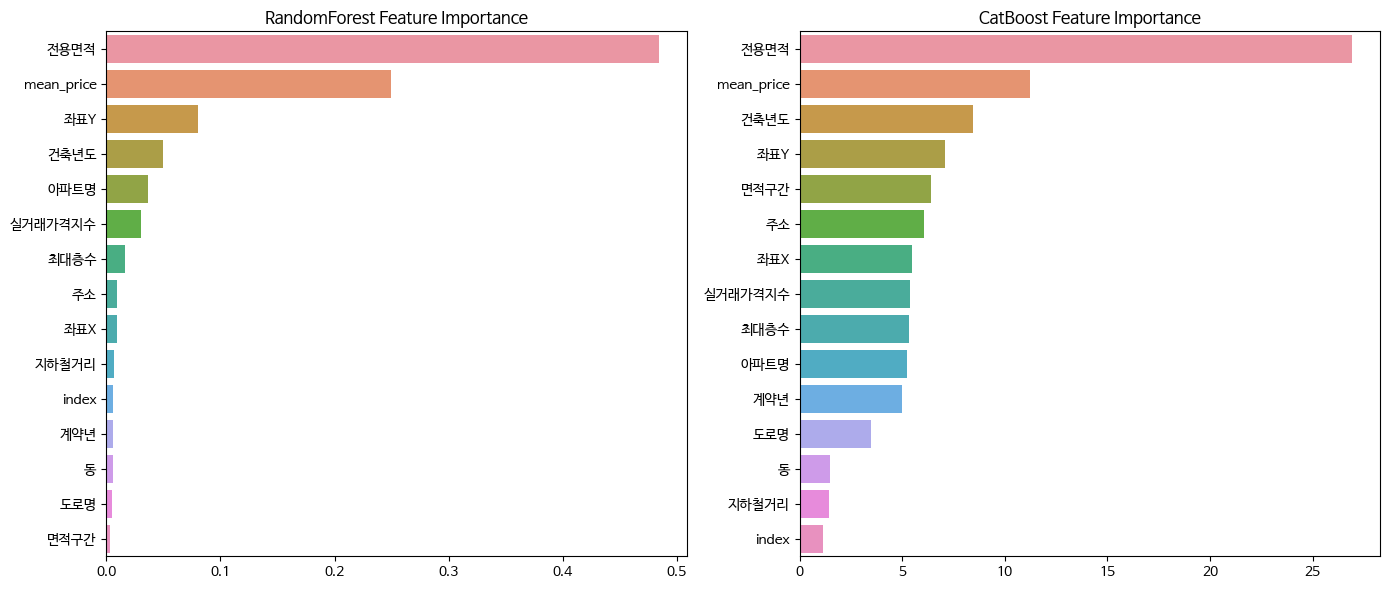

In [14]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from catboost import CatBoostRegressor
from tqdm import tqdm

# 중요도가 높은 피처 리스트
important_features = [
    'index', '전용면적', 'mean_price', '건축년도', '좌표Y', '아파트명', 
    '실거래가격지수', '최대층수', '주소', '면적구간', 
    '계약년', '동', '좌표X', '도로명', '지하철거리'
]

def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

output_df = pd.DataFrame()
test_score = []

# Lists to store all predictions and targets for global RMSE calculation
all_y_val = []
all_rf_pred = []
all_cb_pred = []

for gu in df['구'].value_counts().keys():
    print(gu)
    concat_select_gu = df[df['구'] == gu]
    print(concat_select_gu.shape)
    
    # Filter columns based on important_features and include 'target'
    dt_train = concat_select_gu.query('is_test == 0')[important_features + ['target']]
    dt_test = concat_select_gu.query('is_test == 1')[important_features]

    # Drop the 'is_test' column
    dt_test['target'] = 0

    label_encoders = {}
    continuous_columns_v2 = []
    categorical_columns_v2 = []

    for column in dt_train.columns:
        if pd.api.types.is_numeric_dtype(dt_train[column]):
            continuous_columns_v2.append(column)
        else:
            categorical_columns_v2.append(column)

    for col in tqdm(categorical_columns_v2):
        lbl = LabelEncoder()
        lbl.fit(dt_train[col].astype(str))
        dt_train[col] = lbl.transform(dt_train[col].astype(str))
        label_encoders[col] = lbl

        for label in np.unique(dt_test[col]):
            if label not in lbl.classes_:
                lbl.classes_ = np.append(lbl.classes_, label)

        dt_test[col] = lbl.transform(dt_test[col].astype(str))

    assert dt_train.shape[1] == dt_test.shape[1]

    y_train = dt_train['target']
    X_train = dt_train.drop(['target'], axis=1)
    # Split data for training and validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

    # Initialize and train RandomForest model with best hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='auto',
        random_state=1,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_val)

    # Initialize and train CatBoost model
    cb_model = CatBoostRegressor(
        iterations=700,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        random_state=1,
        verbose=100
    )
    cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=False)
    cb_pred = cb_model.predict(X_val)

    # Calculate RMSE for both models
    rf_rmse = np.sqrt(metrics.mean_squared_error(y_val, rf_pred))
    cb_rmse = np.sqrt(metrics.mean_squared_error(y_val, cb_pred))
    test_score.append((gu, rf_rmse, cb_rmse))

    # Store predictions and actual values for global RMSE calculation
    all_y_val.extend(y_val)
    all_rf_pred.extend(rf_pred)
    all_cb_pred.extend(cb_pred)

    # Save both models
    with open('saved_rf_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    
    with open('saved_cb_model.pkl', 'wb') as f:
        pickle.dump(cb_model, f)

    # Load models
    with open('saved_rf_model.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    
    with open('saved_cb_model.pkl', 'rb') as f:
        cb_model = pickle.load(f)

    # Drop 'target' column before prediction
    X_test = dt_test.drop(columns=['target'], errors='ignore')

    # Ensure columns match between train and test
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # Align columns with training data

    # Make predictions with both models
    rf_test_pred = rf_model.predict(X_test)
    cb_test_pred = cb_model.predict(X_test)

    # Average the predictions from both models
    final_pred = (rf_test_pred * 0.7 + cb_test_pred * 0.3)  # 0.7 for RandomForest, 0.3 for CatBoost

    # Prepare the results
    preds_df = pd.DataFrame(final_pred.astype(int), columns=["target"])
    preds_df_gu = pd.concat([dt_test.reset_index(drop=True)['index'], preds_df], axis=1)
    
    output_df = pd.concat([output_df, preds_df_gu])

# Sort and save the output dataframe with only the target column
output_df.sort_values('index').drop('index', axis=1).to_csv('7월19일_앙상블_하이퍼파라미터튜닝.csv', index=False)

# Calculate global RMSE
all_y_val = np.array(all_y_val)
all_rf_pred = np.array(all_rf_pred)
all_cb_pred = np.array(all_cb_pred)

# Compute final prediction using the same weights
final_global_pred = (all_rf_pred * 0.7 + all_cb_pred * 0.3)
global_rmse = np.sqrt(metrics.mean_squared_error(all_y_val, final_global_pred))

print("Test scores (RMSE) for each 구:")
for score in test_score:
    print(f"{score[0]}: RF RMSE = {score[1]:.4f}, CB RMSE = {score[2]:.4f}")

print(f"Global RMSE for the ensemble model: {global_rmse:.4f}")

# Feature Importance Visualization
importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances_rf = importances_rf.sort_values(ascending=False)

importances_cb = pd.Series(cb_model.get_feature_importance(), index=X_train.columns)
importances_cb = importances_cb.sort_values(ascending=False)

plt.figure(figsize=(14, 6))

# RandomForest Feature Importance
plt.subplot(1, 2, 1)
sns.barplot(x=importances_rf, y=importances_rf.index)
plt.title('RandomForest Feature Importance')

# CatBoost Feature Importance
plt.subplot(1, 2, 2)
sns.barplot(x=importances_cb, y=importances_cb.index)
plt.title('CatBoost Feature Importance')

plt.tight_layout()
plt.show()


노원구
(114864, 30)


100%|██████████| 4/4 [00:00<00:00, 54.39it/s]


0:	learn: 16031.4196628	test: 16270.4797486	best: 16270.4797486 (0)	total: 65.5ms	remaining: 45.8s
100:	learn: 2603.4604756	test: 2676.0038355	best: 2676.0038355 (100)	total: 1.01s	remaining: 5.97s
200:	learn: 2283.9101654	test: 2425.4494907	best: 2425.4494907 (200)	total: 1.96s	remaining: 4.87s
300:	learn: 2150.1549347	test: 2367.1718537	best: 2367.1718537 (300)	total: 2.92s	remaining: 3.87s
400:	learn: 2064.3441177	test: 2341.0464939	best: 2341.0464939 (400)	total: 3.88s	remaining: 2.9s
500:	learn: 2002.6231688	test: 2331.4184724	best: 2331.4184724 (500)	total: 4.86s	remaining: 1.93s
600:	learn: 1954.5523710	test: 2327.6799723	best: 2327.6799723 (600)	total: 5.79s	remaining: 953ms
699:	learn: 1915.0618052	test: 2325.2941046	best: 2325.2941046 (699)	total: 6.73s	remaining: 0us

bestTest = 2325.294105
bestIteration = 699

송파구
(72102, 30)


100%|██████████| 4/4 [00:00<00:00, 80.42it/s]


0:	learn: 43863.1393740	test: 43690.0964871	best: 43690.0964871 (0)	total: 11.9ms	remaining: 8.31s
100:	learn: 6858.7862723	test: 7402.9675297	best: 7402.9675297 (100)	total: 814ms	remaining: 4.83s
200:	learn: 5840.3599211	test: 6662.5440467	best: 6662.5440467 (200)	total: 1.61s	remaining: 4.01s
300:	learn: 5385.6009977	test: 6417.1312241	best: 6417.1312241 (300)	total: 2.41s	remaining: 3.2s
400:	learn: 5091.7760750	test: 6288.1214268	best: 6287.9856774 (399)	total: 3.22s	remaining: 2.4s
500:	learn: 4886.2340642	test: 6236.5700076	best: 6235.5223125 (498)	total: 4.05s	remaining: 1.61s
600:	learn: 4732.5498204	test: 6204.1765332	best: 6203.9948517 (599)	total: 4.85s	remaining: 799ms
699:	learn: 4605.3713983	test: 6185.4338093	best: 6185.4338093 (699)	total: 5.66s	remaining: 0us

bestTest = 6185.433809
bestIteration = 699

강남구
(65941, 30)


100%|██████████| 4/4 [00:00<00:00, 79.79it/s]


0:	learn: 73446.2774757	test: 74495.9303166	best: 74495.9303166 (0)	total: 10.6ms	remaining: 7.39s
100:	learn: 12930.4774993	test: 14989.1121517	best: 14989.1121517 (100)	total: 836ms	remaining: 4.96s
200:	learn: 10797.3650227	test: 13750.1716214	best: 13750.1716214 (200)	total: 1.64s	remaining: 4.06s
300:	learn: 9701.3003770	test: 13249.1758718	best: 13249.1758718 (300)	total: 2.44s	remaining: 3.23s
400:	learn: 9046.4362904	test: 13030.6531688	best: 13030.6531688 (400)	total: 3.24s	remaining: 2.42s
500:	learn: 8517.2378452	test: 12881.1370520	best: 12881.1370520 (500)	total: 4.03s	remaining: 1.6s
600:	learn: 8094.0329235	test: 12776.5745218	best: 12776.5745218 (600)	total: 4.84s	remaining: 797ms
699:	learn: 7762.2096453	test: 12722.0456391	best: 12720.0598841 (691)	total: 5.62s	remaining: 0us

bestTest = 12720.05988
bestIteration = 691

Shrink model to first 692 iterations.
강서구
(65192, 30)


100%|██████████| 4/4 [00:00<00:00, 81.36it/s]


0:	learn: 22178.4129146	test: 21746.1510577	best: 21746.1510577 (0)	total: 10.2ms	remaining: 7.12s
100:	learn: 3479.0608428	test: 3795.9960158	best: 3795.9960158 (100)	total: 791ms	remaining: 4.69s
200:	learn: 2996.0386333	test: 3447.8770846	best: 3447.8770846 (200)	total: 1.56s	remaining: 3.87s
300:	learn: 2767.6460848	test: 3338.4345241	best: 3338.4345241 (300)	total: 2.34s	remaining: 3.1s
400:	learn: 2631.5685625	test: 3285.3230780	best: 3285.3230780 (400)	total: 3.12s	remaining: 2.33s
500:	learn: 2532.3896838	test: 3259.4208603	best: 3259.1909265 (498)	total: 3.94s	remaining: 1.56s
600:	learn: 2459.8094101	test: 3247.5245969	best: 3247.5245969 (600)	total: 4.72s	remaining: 778ms
699:	learn: 2393.7341525	test: 3244.4575692	best: 3244.2771582 (696)	total: 5.49s	remaining: 0us

bestTest = 3244.277158
bestIteration = 696

Shrink model to first 697 iterations.
구로구
(57612, 30)


100%|██████████| 4/4 [00:00<00:00, 97.16it/s]


0:	learn: 18323.3169699	test: 18407.1833464	best: 18407.1833464 (0)	total: 9.44ms	remaining: 6.6s
100:	learn: 2895.7918780	test: 3239.9566881	best: 3239.9566881 (100)	total: 760ms	remaining: 4.51s
200:	learn: 2461.4210187	test: 2992.5256172	best: 2991.9652104 (197)	total: 1.51s	remaining: 3.76s
300:	learn: 2254.9304315	test: 2924.9497232	best: 2924.9497232 (300)	total: 2.28s	remaining: 3.03s
400:	learn: 2128.1445588	test: 2899.6723101	best: 2899.6723101 (400)	total: 3.06s	remaining: 2.28s
500:	learn: 2037.5580669	test: 2888.4261331	best: 2888.1618866 (499)	total: 3.82s	remaining: 1.52s
600:	learn: 1968.8085538	test: 2879.9277392	best: 2879.9277392 (600)	total: 4.57s	remaining: 753ms
699:	learn: 1911.3032238	test: 2879.1728006	best: 2876.1323973 (674)	total: 5.33s	remaining: 0us

bestTest = 2876.132397
bestIteration = 674

Shrink model to first 675 iterations.
성북구
(56733, 30)


100%|██████████| 4/4 [00:00<00:00, 103.41it/s]


0:	learn: 18270.3014013	test: 18121.4738924	best: 18121.4738924 (0)	total: 9.86ms	remaining: 6.89s
100:	learn: 2927.6120231	test: 3203.6911342	best: 3203.6911342 (100)	total: 719ms	remaining: 4.26s
200:	learn: 2579.9215042	test: 2985.7940099	best: 2985.7940099 (200)	total: 1.43s	remaining: 3.55s
300:	learn: 2405.7609272	test: 2930.4051638	best: 2930.4051638 (300)	total: 2.15s	remaining: 2.85s
400:	learn: 2295.1231165	test: 2913.1444123	best: 2913.1444123 (400)	total: 2.87s	remaining: 2.14s
500:	learn: 2218.9189261	test: 2910.3213819	best: 2908.1381070 (476)	total: 3.57s	remaining: 1.42s
600:	learn: 2159.2090414	test: 2910.9244181	best: 2908.1381070 (476)	total: 4.28s	remaining: 704ms
699:	learn: 2106.1279623	test: 2913.1158348	best: 2908.1381070 (476)	total: 4.98s	remaining: 0us

bestTest = 2908.138107
bestIteration = 476

Shrink model to first 477 iterations.
양천구
(54106, 30)


100%|██████████| 4/4 [00:00<00:00, 97.87it/s]


0:	learn: 34666.3440602	test: 34825.3553035	best: 34825.3553035 (0)	total: 10.1ms	remaining: 7.07s
100:	learn: 4866.0084215	test: 5295.4245429	best: 5295.4245429 (100)	total: 749ms	remaining: 4.44s
200:	learn: 4007.2755098	test: 4639.7842048	best: 4639.7842048 (200)	total: 1.48s	remaining: 3.66s
300:	learn: 3625.0486880	test: 4447.2205473	best: 4447.2205473 (300)	total: 2.27s	remaining: 3.01s
400:	learn: 3385.7126649	test: 4368.9487614	best: 4368.9487614 (400)	total: 3.04s	remaining: 2.27s
500:	learn: 3220.9360104	test: 4327.9771141	best: 4327.9771141 (500)	total: 3.81s	remaining: 1.51s
600:	learn: 3097.1430770	test: 4306.7988316	best: 4306.3990511 (597)	total: 4.55s	remaining: 749ms
699:	learn: 2985.8600861	test: 4291.4065303	best: 4289.5180554 (689)	total: 5.29s	remaining: 0us

bestTest = 4289.518055
bestIteration = 689

Shrink model to first 690 iterations.
강동구
(53467, 30)


100%|██████████| 4/4 [00:00<00:00, 99.16it/s]


0:	learn: 26302.9602833	test: 26377.0952351	best: 26377.0952351 (0)	total: 10.2ms	remaining: 7.12s
100:	learn: 4049.0046113	test: 4518.9668182	best: 4518.9668182 (100)	total: 757ms	remaining: 4.49s
200:	learn: 3407.7222406	test: 4089.8782915	best: 4089.8782915 (200)	total: 1.53s	remaining: 3.79s
300:	learn: 3126.7039015	test: 3963.9095673	best: 3963.9095673 (300)	total: 2.28s	remaining: 3.02s
400:	learn: 2948.0584759	test: 3904.9803507	best: 3904.9803507 (400)	total: 3.02s	remaining: 2.25s
500:	learn: 2817.2484973	test: 3868.8488338	best: 3868.8488338 (500)	total: 3.77s	remaining: 1.5s
600:	learn: 2715.4870207	test: 3845.6310955	best: 3845.6310955 (600)	total: 4.51s	remaining: 743ms
699:	learn: 2634.0176837	test: 3833.6501593	best: 3833.6501593 (699)	total: 5.25s	remaining: 0us

bestTest = 3833.650159
bestIteration = 699

도봉구
(52800, 30)


100%|██████████| 4/4 [00:00<00:00, 110.01it/s]


0:	learn: 14549.8780588	test: 14663.9924067	best: 14663.9924067 (0)	total: 9.14ms	remaining: 6.39s
100:	learn: 2409.2082001	test: 2661.2488348	best: 2661.2488348 (100)	total: 718ms	remaining: 4.26s
200:	learn: 2135.4591441	test: 2507.6991791	best: 2507.6991791 (200)	total: 1.48s	remaining: 3.66s
300:	learn: 2006.0894608	test: 2460.5743204	best: 2460.5743204 (300)	total: 2.19s	remaining: 2.9s
400:	learn: 1927.3969926	test: 2447.2524207	best: 2446.9698986 (396)	total: 2.92s	remaining: 2.18s
500:	learn: 1868.3196413	test: 2437.0433120	best: 2437.0433120 (500)	total: 3.63s	remaining: 1.44s
600:	learn: 1818.2024459	test: 2434.8217952	best: 2434.6217008 (596)	total: 4.36s	remaining: 718ms
699:	learn: 1779.1163126	test: 2432.5713946	best: 2431.8664370 (687)	total: 5.11s	remaining: 0us

bestTest = 2431.866437
bestIteration = 687

Shrink model to first 688 iterations.
서초구
(48159, 30)


100%|██████████| 4/4 [00:00<00:00, 102.37it/s]


0:	learn: 66575.5843028	test: 68954.0373491	best: 68954.0373491 (0)	total: 9.08ms	remaining: 6.34s
100:	learn: 11464.8441868	test: 13216.4382147	best: 13216.4382147 (100)	total: 749ms	remaining: 4.44s
200:	learn: 9381.8142765	test: 11769.9896037	best: 11769.9896037 (200)	total: 1.48s	remaining: 3.67s
300:	learn: 8417.5611655	test: 11324.4883575	best: 11324.3032541 (299)	total: 2.19s	remaining: 2.91s
400:	learn: 7791.9396740	test: 11121.8430119	best: 11121.8430119 (400)	total: 2.94s	remaining: 2.19s
500:	learn: 7357.6741431	test: 11013.0157946	best: 11012.4215114 (499)	total: 3.66s	remaining: 1.45s
600:	learn: 6975.3671062	test: 10956.8220474	best: 10956.8220474 (600)	total: 4.4s	remaining: 725ms
699:	learn: 6681.4719692	test: 10937.1909186	best: 10936.0280910 (698)	total: 5.11s	remaining: 0us

bestTest = 10936.02809
bestIteration = 698

Shrink model to first 699 iterations.
영등포구
(47738, 30)


100%|██████████| 4/4 [00:00<00:00, 118.36it/s]


0:	learn: 34697.0037033	test: 34199.6313927	best: 34199.6313927 (0)	total: 10.2ms	remaining: 7.12s
100:	learn: 4782.6687373	test: 5367.1278789	best: 5367.1278789 (100)	total: 762ms	remaining: 4.52s
200:	learn: 3858.6569827	test: 4703.2740286	best: 4703.2740286 (200)	total: 1.5s	remaining: 3.71s
300:	learn: 3454.1390494	test: 4509.8344173	best: 4509.8344173 (300)	total: 2.2s	remaining: 2.92s
400:	learn: 3188.4379954	test: 4431.7529984	best: 4431.7529984 (400)	total: 2.91s	remaining: 2.17s
500:	learn: 2998.3925126	test: 4390.4773127	best: 4389.7317043 (496)	total: 3.63s	remaining: 1.44s
600:	learn: 2862.3587859	test: 4373.2690972	best: 4373.2690972 (600)	total: 4.37s	remaining: 720ms
699:	learn: 2747.2048608	test: 4362.2359709	best: 4361.0088983 (682)	total: 5.1s	remaining: 0us

bestTest = 4361.008898
bestIteration = 682

Shrink model to first 683 iterations.
마포구
(40512, 30)


100%|██████████| 4/4 [00:00<00:00, 134.13it/s]


0:	learn: 32722.8695637	test: 32735.3257932	best: 32735.3257932 (0)	total: 9.6ms	remaining: 6.71s
100:	learn: 5340.6911135	test: 5897.3836217	best: 5897.3836217 (100)	total: 729ms	remaining: 4.32s
200:	learn: 4510.3684868	test: 5497.1374769	best: 5497.1374769 (200)	total: 1.44s	remaining: 3.59s
300:	learn: 4142.2132950	test: 5377.9971611	best: 5377.6376332 (295)	total: 2.13s	remaining: 2.82s
400:	learn: 3881.3006546	test: 5309.7558552	best: 5309.7558552 (400)	total: 2.82s	remaining: 2.1s
500:	learn: 3693.5842308	test: 5291.4773423	best: 5290.6417823 (491)	total: 3.55s	remaining: 1.41s
600:	learn: 3561.1045108	test: 5281.9050936	best: 5281.8400707 (597)	total: 4.27s	remaining: 703ms
699:	learn: 3450.6398349	test: 5270.5827312	best: 5270.0072174 (693)	total: 4.98s	remaining: 0us

bestTest = 5270.007217
bestIteration = 693

Shrink model to first 694 iterations.
동작구
(40371, 30)


100%|██████████| 4/4 [00:00<00:00, 139.56it/s]


0:	learn: 27239.4267361	test: 26020.5008289	best: 26020.5008289 (0)	total: 9.13ms	remaining: 6.38s
100:	learn: 4269.5888709	test: 4461.1259876	best: 4461.1259876 (100)	total: 724ms	remaining: 4.29s
200:	learn: 3674.8388423	test: 4126.2475648	best: 4126.2475648 (200)	total: 1.45s	remaining: 3.59s
300:	learn: 3367.6456745	test: 4015.8149560	best: 4015.8149560 (300)	total: 2.13s	remaining: 2.83s
400:	learn: 3173.8350162	test: 3968.9695292	best: 3968.0697104 (398)	total: 2.83s	remaining: 2.11s
500:	learn: 3022.7251763	test: 3952.6543361	best: 3952.6543361 (500)	total: 3.52s	remaining: 1.4s
600:	learn: 2909.9197697	test: 3944.8156283	best: 3943.9675137 (596)	total: 4.24s	remaining: 699ms
699:	learn: 2821.8894935	test: 3941.0903113	best: 3940.3792535 (663)	total: 4.94s	remaining: 0us

bestTest = 3940.379253
bestIteration = 663

Shrink model to first 664 iterations.
동대문구
(39955, 30)


100%|██████████| 4/4 [00:00<00:00, 138.00it/s]


0:	learn: 20945.6549406	test: 20552.8844624	best: 20552.8844624 (0)	total: 8.76ms	remaining: 6.12s
100:	learn: 3029.8489254	test: 3211.2809366	best: 3211.2809366 (100)	total: 729ms	remaining: 4.33s
200:	learn: 2583.3765829	test: 2931.6747960	best: 2931.6747960 (200)	total: 1.48s	remaining: 3.69s
300:	learn: 2380.2941332	test: 2869.9344416	best: 2869.9344416 (300)	total: 2.18s	remaining: 2.88s
400:	learn: 2251.6718801	test: 2844.5820048	best: 2844.5820048 (400)	total: 2.88s	remaining: 2.14s
500:	learn: 2153.5199102	test: 2835.8618239	best: 2835.8618239 (500)	total: 3.57s	remaining: 1.42s
600:	learn: 2077.3662875	test: 2828.9842817	best: 2828.2035574 (596)	total: 4.27s	remaining: 703ms
699:	learn: 2014.9038153	test: 2825.3009558	best: 2824.7122636 (698)	total: 4.94s	remaining: 0us

bestTest = 2824.712264
bestIteration = 698

Shrink model to first 699 iterations.
성동구
(39654, 30)


100%|██████████| 4/4 [00:00<00:00, 142.53it/s]


0:	learn: 40377.5681566	test: 37691.6766795	best: 37691.6766795 (0)	total: 8.61ms	remaining: 6.02s
100:	learn: 5987.6596333	test: 7188.7445243	best: 7188.7445243 (100)	total: 642ms	remaining: 3.81s
200:	learn: 4861.9756560	test: 6659.0928428	best: 6659.0928428 (200)	total: 1.32s	remaining: 3.27s
300:	learn: 4383.6951698	test: 6537.2609738	best: 6537.2609738 (300)	total: 2s	remaining: 2.65s
400:	learn: 4102.2863670	test: 6538.7660181	best: 6527.0169159 (342)	total: 2.67s	remaining: 1.99s
500:	learn: 3915.1774601	test: 6558.4655829	best: 6527.0169159 (342)	total: 3.31s	remaining: 1.31s
600:	learn: 3758.4292688	test: 6574.4260855	best: 6527.0169159 (342)	total: 3.97s	remaining: 655ms
699:	learn: 3645.1257686	test: 6595.0181231	best: 6527.0169159 (342)	total: 4.62s	remaining: 0us

bestTest = 6527.016916
bestIteration = 342

Shrink model to first 343 iterations.
은평구
(38297, 30)


100%|██████████| 4/4 [00:00<00:00, 134.57it/s]


0:	learn: 19769.8642734	test: 19194.1530085	best: 19194.1530085 (0)	total: 8.81ms	remaining: 6.16s
100:	learn: 3683.1534799	test: 4027.5984826	best: 4027.5984826 (100)	total: 712ms	remaining: 4.22s
200:	learn: 3103.8691338	test: 3733.5494513	best: 3733.5494513 (200)	total: 1.42s	remaining: 3.52s
300:	learn: 2828.4385042	test: 3645.0544340	best: 3643.8730636 (295)	total: 2.12s	remaining: 2.81s
400:	learn: 2646.0009890	test: 3623.2538217	best: 3622.2364321 (398)	total: 2.82s	remaining: 2.1s
500:	learn: 2520.6409475	test: 3615.7477801	best: 3614.3117221 (492)	total: 3.51s	remaining: 1.4s
600:	learn: 2416.6600973	test: 3617.3469604	best: 3614.3117221 (492)	total: 4.21s	remaining: 693ms
699:	learn: 2331.2760305	test: 3623.7280661	best: 3614.3117221 (492)	total: 4.92s	remaining: 0us

bestTest = 3614.311722
bestIteration = 492

Shrink model to first 493 iterations.
중랑구
(37256, 30)


100%|██████████| 4/4 [00:00<00:00, 150.30it/s]


0:	learn: 15424.4285808	test: 15690.0564470	best: 15690.0564470 (0)	total: 9.21ms	remaining: 6.44s
100:	learn: 2436.2389195	test: 2737.4127939	best: 2737.4127939 (100)	total: 700ms	remaining: 4.15s
200:	learn: 2100.4192230	test: 2529.7591250	best: 2529.7591250 (200)	total: 1.41s	remaining: 3.5s
300:	learn: 1931.6494716	test: 2460.0521859	best: 2460.0521859 (300)	total: 2.12s	remaining: 2.81s
400:	learn: 1823.1612174	test: 2435.4606091	best: 2435.4606091 (400)	total: 2.83s	remaining: 2.11s
500:	learn: 1738.6633719	test: 2421.8701005	best: 2421.8701005 (500)	total: 3.51s	remaining: 1.39s
600:	learn: 1674.9035540	test: 2417.6788883	best: 2417.3817116 (598)	total: 4.21s	remaining: 693ms
699:	learn: 1625.2076757	test: 2413.5873826	best: 2413.5124847 (696)	total: 4.9s	remaining: 0us

bestTest = 2413.512485
bestIteration = 696

Shrink model to first 697 iterations.
관악구
(36219, 30)


100%|██████████| 4/4 [00:00<00:00, 154.44it/s]


0:	learn: 16821.0641670	test: 16925.6997642	best: 16925.6997642 (0)	total: 8.68ms	remaining: 6.07s
100:	learn: 3002.3275307	test: 3289.8152540	best: 3289.8152540 (100)	total: 709ms	remaining: 4.21s
200:	learn: 2619.1947316	test: 3075.1016165	best: 3075.1016165 (200)	total: 1.43s	remaining: 3.54s
300:	learn: 2414.7738381	test: 3019.6078804	best: 3019.6078804 (300)	total: 2.12s	remaining: 2.81s
400:	learn: 2292.3926110	test: 3005.1755298	best: 3005.1755298 (400)	total: 2.83s	remaining: 2.11s
500:	learn: 2203.4024730	test: 3001.0919058	best: 2998.6961583 (490)	total: 3.54s	remaining: 1.41s
600:	learn: 2129.4464461	test: 2999.5553466	best: 2998.6961583 (490)	total: 4.24s	remaining: 698ms
699:	learn: 2070.9694439	test: 3001.8565823	best: 2998.6961583 (490)	total: 4.92s	remaining: 0us

bestTest = 2998.696158
bestIteration = 490

Shrink model to first 491 iterations.
서대문구
(33096, 30)


100%|██████████| 4/4 [00:00<00:00, 162.74it/s]


0:	learn: 25157.2408415	test: 25068.9528735	best: 25068.9528735 (0)	total: 8.8ms	remaining: 6.15s
100:	learn: 3832.2111857	test: 4164.4080729	best: 4164.4080729 (100)	total: 725ms	remaining: 4.3s
200:	learn: 3207.5491385	test: 3807.6292166	best: 3807.6292166 (200)	total: 1.41s	remaining: 3.51s
300:	learn: 2919.2551244	test: 3709.0985507	best: 3709.0029265 (298)	total: 2.1s	remaining: 2.79s
400:	learn: 2742.6446484	test: 3664.6708224	best: 3664.5611555 (399)	total: 2.79s	remaining: 2.08s
500:	learn: 2616.7399537	test: 3644.2987013	best: 3643.7862980 (488)	total: 3.49s	remaining: 1.39s
600:	learn: 2513.0388816	test: 3633.1857335	best: 3633.0722500 (599)	total: 4.18s	remaining: 688ms
699:	learn: 2432.3064431	test: 3629.8098052	best: 3628.4294247 (673)	total: 4.87s	remaining: 0us

bestTest = 3628.429425
bestIteration = 673

Shrink model to first 674 iterations.
광진구
(22221, 30)


100%|██████████| 4/4 [00:00<00:00, 223.35it/s]


0:	learn: 33140.9057813	test: 33217.5759701	best: 33217.5759701 (0)	total: 8.04ms	remaining: 5.62s
100:	learn: 5965.4652687	test: 6961.0518991	best: 6961.0518991 (100)	total: 651ms	remaining: 3.86s
200:	learn: 5023.0767228	test: 6668.1848929	best: 6668.1848929 (200)	total: 1.28s	remaining: 3.17s
300:	learn: 4556.2329466	test: 6598.1309440	best: 6591.6254662 (280)	total: 1.9s	remaining: 2.52s
400:	learn: 4245.1770687	test: 6574.2365705	best: 6569.3625791 (396)	total: 2.52s	remaining: 1.88s
500:	learn: 4018.2421491	test: 6583.4402521	best: 6569.3625791 (396)	total: 3.14s	remaining: 1.25s
600:	learn: 3827.3749361	test: 6585.5741456	best: 6569.3625791 (396)	total: 3.77s	remaining: 622ms
699:	learn: 3681.6093929	test: 6594.3724330	best: 6569.3625791 (396)	total: 4.4s	remaining: 0us

bestTest = 6569.362579
bestIteration = 396

Shrink model to first 397 iterations.
강북구
(22135, 30)


100%|██████████| 4/4 [00:00<00:00, 235.89it/s]


0:	learn: 15047.9870796	test: 15299.5932427	best: 15299.5932427 (0)	total: 7.09ms	remaining: 4.95s
100:	learn: 2308.6567230	test: 2674.7381241	best: 2674.7381241 (100)	total: 615ms	remaining: 3.64s
200:	learn: 2010.1521895	test: 2544.6470462	best: 2544.6470462 (200)	total: 1.22s	remaining: 3.02s
300:	learn: 1866.3035660	test: 2516.1822462	best: 2516.1381077 (299)	total: 1.83s	remaining: 2.43s
400:	learn: 1768.5207455	test: 2511.1832310	best: 2508.6858504 (374)	total: 2.46s	remaining: 1.84s
500:	learn: 1702.6144127	test: 2511.2995153	best: 2508.6858504 (374)	total: 3.11s	remaining: 1.23s
600:	learn: 1647.9659777	test: 2516.6791086	best: 2508.6858504 (374)	total: 3.73s	remaining: 614ms
699:	learn: 1604.0548708	test: 2522.0023377	best: 2508.6858504 (374)	total: 4.33s	remaining: 0us

bestTest = 2508.68585
bestIteration = 374

Shrink model to first 375 iterations.
용산구
(20509, 30)


100%|██████████| 4/4 [00:00<00:00, 241.40it/s]


0:	learn: 82164.2220307	test: 80471.5649952	best: 80471.5649952 (0)	total: 7.84ms	remaining: 5.48s
100:	learn: 10930.6846191	test: 14902.3674016	best: 14902.3674016 (100)	total: 687ms	remaining: 4.08s
200:	learn: 8710.6064096	test: 13914.5119529	best: 13914.5119529 (200)	total: 1.34s	remaining: 3.33s
300:	learn: 7686.6902901	test: 13667.4260347	best: 13667.4260347 (300)	total: 2s	remaining: 2.65s
400:	learn: 7080.2942521	test: 13558.8651396	best: 13554.5252157 (396)	total: 2.66s	remaining: 1.99s
500:	learn: 6626.2440474	test: 13537.5818536	best: 13535.2196153 (494)	total: 3.3s	remaining: 1.31s
600:	learn: 6269.5748544	test: 13517.9881654	best: 13514.0644613 (584)	total: 3.92s	remaining: 646ms
699:	learn: 5985.0651453	test: 13521.9111118	best: 13510.1399807 (631)	total: 4.56s	remaining: 0us

bestTest = 13510.13998
bestIteration = 631

Shrink model to first 632 iterations.
금천구
(19655, 30)


100%|██████████| 4/4 [00:00<00:00, 257.92it/s]


0:	learn: 15036.0578859	test: 15480.9708832	best: 15480.9708832 (0)	total: 7.01ms	remaining: 4.9s
100:	learn: 2221.0773181	test: 2588.5265470	best: 2588.5265470 (100)	total: 611ms	remaining: 3.63s
200:	learn: 1914.6410031	test: 2417.5932679	best: 2417.5932679 (200)	total: 1.2s	remaining: 2.98s
300:	learn: 1750.8841822	test: 2367.3049168	best: 2367.3049168 (300)	total: 1.81s	remaining: 2.4s
400:	learn: 1644.4437258	test: 2344.5070481	best: 2344.5070481 (400)	total: 2.42s	remaining: 1.8s
500:	learn: 1568.3294907	test: 2335.3725632	best: 2335.3725632 (500)	total: 3.02s	remaining: 1.2s
600:	learn: 1511.7371322	test: 2332.4986641	best: 2330.7197812 (571)	total: 3.61s	remaining: 595ms
699:	learn: 1461.4771432	test: 2330.9596946	best: 2330.0843865 (655)	total: 4.19s	remaining: 0us

bestTest = 2330.084386
bestIteration = 655

Shrink model to first 656 iterations.
중구
(13476, 30)


100%|██████████| 4/4 [00:00<00:00, 273.61it/s]


0:	learn: 33104.0788570	test: 31695.5896506	best: 31695.5896506 (0)	total: 6.92ms	remaining: 4.84s
100:	learn: 5447.2487089	test: 7355.3188223	best: 7355.3188223 (100)	total: 598ms	remaining: 3.54s
200:	learn: 4605.1968113	test: 7086.4282761	best: 7086.4282761 (200)	total: 1.2s	remaining: 2.98s
300:	learn: 4200.2141588	test: 7061.3598155	best: 7061.2148897 (299)	total: 1.77s	remaining: 2.35s
400:	learn: 3931.2131725	test: 7063.4830727	best: 7055.2896026 (372)	total: 2.35s	remaining: 1.75s
500:	learn: 3745.6946163	test: 7072.9146510	best: 7055.2896026 (372)	total: 2.91s	remaining: 1.15s
600:	learn: 3608.6579196	test: 7091.0978029	best: 7055.2896026 (372)	total: 3.48s	remaining: 574ms
699:	learn: 3500.4236093	test: 7095.3933504	best: 7055.2896026 (372)	total: 4.05s	remaining: 0us

bestTest = 7055.289603
bestIteration = 372

Shrink model to first 373 iterations.
종로구
(9059, 30)


100%|██████████| 4/4 [00:00<00:00, 452.03it/s]


0:	learn: 37201.0362767	test: 39413.9210778	best: 39413.9210778 (0)	total: 4.79ms	remaining: 3.35s
100:	learn: 4690.2255373	test: 6815.8707343	best: 6815.8707343 (100)	total: 412ms	remaining: 2.44s
200:	learn: 3680.8845582	test: 6458.6070333	best: 6458.6070333 (200)	total: 817ms	remaining: 2.03s
300:	learn: 3213.7447931	test: 6409.4836388	best: 6405.4980062 (292)	total: 1.24s	remaining: 1.65s
400:	learn: 2912.5125821	test: 6404.3427955	best: 6392.9697386 (371)	total: 1.66s	remaining: 1.24s
500:	learn: 2685.0991283	test: 6426.6973197	best: 6392.9697386 (371)	total: 2.06s	remaining: 821ms
600:	learn: 2522.8879689	test: 6457.4413913	best: 6392.9697386 (371)	total: 2.47s	remaining: 407ms
699:	learn: 2394.3629499	test: 6477.7576690	best: 6392.9697386 (371)	total: 2.88s	remaining: 0us

bestTest = 6392.969739
bestIteration = 371

Shrink model to first 372 iterations.
Test scores (RMSE) for each 구:
노원구: RF RMSE = 3489.3729, CB RMSE = 2325.2941
송파구: RF RMSE = 9353.7494, CB RMSE = 6185.4338
강남구:

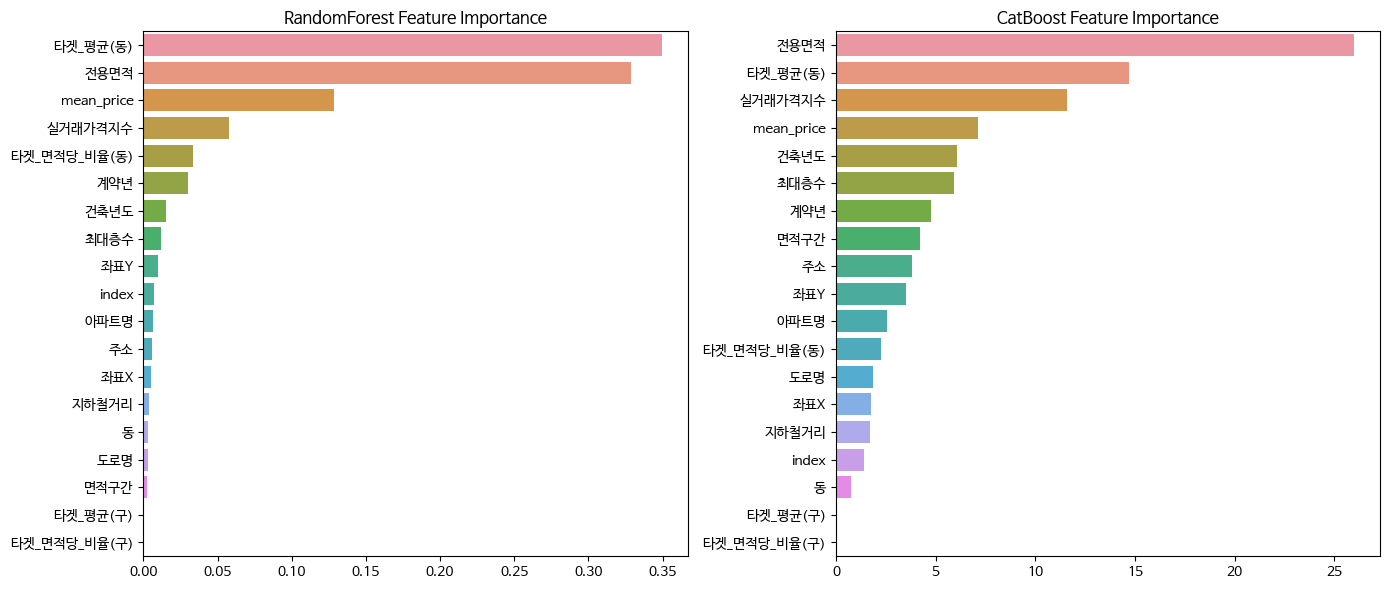

In [15]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from catboost import CatBoostRegressor
from tqdm import tqdm

# 중요도가 높은 피처 리스트
important_features = [
    'index', '전용면적', 'mean_price', '건축년도', '좌표Y', '아파트명', 
    '실거래가격지수', '최대층수', '주소', '면적구간', 
    '계약년', '동', '좌표X', '도로명', '지하철거리', '타겟_평균(동)',
    '타겟_면적당_비율(동)', '타겟_평균(구)', '타겟_면적당_비율(구)'
]

def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

output_df = pd.DataFrame()
test_score = []

# Lists to store all predictions and targets for global RMSE calculation
all_y_val = []
all_rf_pred = []
all_cb_pred = []

for gu in df['구'].value_counts().keys():
    print(gu)
    concat_select_gu = df[df['구'] == gu]
    print(concat_select_gu.shape)
    
    # Filter columns based on important_features and include 'target'
    dt_train = concat_select_gu.query('is_test == 0')[important_features + ['target']]
    dt_test = concat_select_gu.query('is_test == 1')[important_features]

    # Drop the 'is_test' column
    dt_test['target'] = 0

    label_encoders = {}
    continuous_columns_v2 = []
    categorical_columns_v2 = []

    for column in dt_train.columns:
        if pd.api.types.is_numeric_dtype(dt_train[column]):
            continuous_columns_v2.append(column)
        else:
            categorical_columns_v2.append(column)

    for col in tqdm(categorical_columns_v2):
        lbl = LabelEncoder()
        lbl.fit(dt_train[col].astype(str))
        dt_train[col] = lbl.transform(dt_train[col].astype(str))
        label_encoders[col] = lbl

        for label in np.unique(dt_test[col]):
            if label not in lbl.classes_:
                lbl.classes_ = np.append(lbl.classes_, label)

        dt_test[col] = lbl.transform(dt_test[col].astype(str))

    assert dt_train.shape[1] == dt_test.shape[1]

    y_train = dt_train['target']
    X_train = dt_train.drop(['target'], axis=1)
    # Split data for training and validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

    # Initialize and train RandomForest model with best hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='auto',
        random_state=1,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_val)

    # Initialize and train CatBoost model
    cb_model = CatBoostRegressor(
        iterations=700,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        random_state=1,
        verbose=100
    )
    cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=False)
    cb_pred = cb_model.predict(X_val)

    # Calculate RMSE for both models
    rf_rmse = np.sqrt(metrics.mean_squared_error(y_val, rf_pred))
    cb_rmse = np.sqrt(metrics.mean_squared_error(y_val, cb_pred))
    test_score.append((gu, rf_rmse, cb_rmse))

    # Store predictions and actual values for global RMSE calculation
    all_y_val.extend(y_val)
    all_rf_pred.extend(rf_pred)
    all_cb_pred.extend(cb_pred)

    # Save both models
    with open('saved_rf_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    
    with open('saved_cb_model.pkl', 'wb') as f:
        pickle.dump(cb_model, f)

    # Load models
    with open('saved_rf_model.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    
    with open('saved_cb_model.pkl', 'rb') as f:
        cb_model = pickle.load(f)

    # Drop 'target' column before prediction
    X_test = dt_test.drop(columns=['target'], errors='ignore')

    # Ensure columns match between train and test
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # Align columns with training data

    # Make predictions with both models
    rf_test_pred = rf_model.predict(X_test)
    cb_test_pred = cb_model.predict(X_test)

    # Average the predictions from both models
    final_pred = (rf_test_pred * 0.7 + cb_test_pred * 0.3)  # 0.7 for RandomForest, 0.3 for CatBoost

    # Prepare the results
    preds_df = pd.DataFrame(final_pred.astype(int), columns=["target"])
    preds_df_gu = pd.concat([dt_test.reset_index(drop=True)['index'], preds_df], axis=1)
    
    output_df = pd.concat([output_df, preds_df_gu])

# Sort and save the output dataframe with only the target column
output_df.sort_values('index').drop('index', axis=1).to_csv('7월19일_앙상블_하이퍼파라미터튜닝.csv', index=False)

# Calculate global RMSE
all_y_val = np.array(all_y_val)
all_rf_pred = np.array(all_rf_pred)
all_cb_pred = np.array(all_cb_pred)

# Compute final prediction using the same weights
final_global_pred = (all_rf_pred * 0.7 + all_cb_pred * 0.3)
global_rmse = np.sqrt(metrics.mean_squared_error(all_y_val, final_global_pred))

print("Test scores (RMSE) for each 구:")
for score in test_score:
    print(f"{score[0]}: RF RMSE = {score[1]:.4f}, CB RMSE = {score[2]:.4f}")

print(f"Global RMSE for the ensemble model: {global_rmse:.4f}")

# Feature Importance Visualization
importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances_rf = importances_rf.sort_values(ascending=False)

importances_cb = pd.Series(cb_model.get_feature_importance(), index=X_train.columns)
importances_cb = importances_cb.sort_values(ascending=False)

plt.figure(figsize=(14, 6))

# RandomForest Feature Importance
plt.subplot(1, 2, 1)
sns.barplot(x=importances_rf, y=importances_rf.index)
plt.title('RandomForest Feature Importance')

# CatBoost Feature Importance
plt.subplot(1, 2, 2)
sns.barplot(x=importances_cb, y=importances_cb.index)
plt.title('CatBoost Feature Importance')

plt.tight_layout()
plt.show()


- 전용면적
- mean_price
- 건축년도
- 좌표 Y
- 아파트명
- 실거래가격지수
- 최대층수
- 주소
- 면적구간
- 계약년
- 동
- 좌표 X
- 도로명
- 지하철거리

In [11]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from catboost import CatBoostRegressor
from tqdm import tqdm

# 중요도가 높은 피처 리스트
important_features = [
    '전용면적', 'mean_price', '건축년도', '좌표Y', '아파트명', 
    '실거래가격지수', '최대층수', '주소', '면적구간', 
    '계약년', '동', '좌표X', '도로명', '지하철거리'
]

def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

output_df = pd.DataFrame()
test_score = []

# Lists to store all predictions and targets for global RMSE calculation
all_y_val = []
all_rf_pred = []
all_cb_pred = []

for gu in df['구'].value_counts().keys():
    print(gu)
    concat_select_gu = df[df['구'] == gu]
    print(concat_select_gu.shape)
    dt_train = concat_select_gu.query('is_test == 0')[important_features + ['target']]
    dt_test = concat_select_gu.query('is_test == 1')[important_features]
    
    # Drop the 'is_test' column
    dt_test['target'] = 0

    label_encoders = {}
    continuous_columns_v2 = []
    categorical_columns_v2 = []

    for column in dt_train.columns:
        if pd.api.types.is_numeric_dtype(dt_train[column]):
            continuous_columns_v2.append(column)
        else:
            categorical_columns_v2.append(column)

    for col in tqdm(categorical_columns_v2):
        lbl = LabelEncoder()
        lbl.fit(dt_train[col].astype(str))
        dt_train[col] = lbl.transform(dt_train[col].astype(str))
        label_encoders[col] = lbl

        for label in np.unique(dt_test[col]):
            if label not in lbl.classes_:
                lbl.classes_ = np.append(lbl.classes_, label)

        dt_test[col] = lbl.transform(dt_test[col].astype(str))

    assert dt_train.shape[1] == dt_test.shape[1] + 1  # target column이 dt_train에만 있으므로 +1

    y_train = dt_train['target']
    X_train = dt_train.drop(['target'], axis=1)
    # Split data for training and validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

    # Initialize and train RandomForest model with best hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='auto',
        random_state=1,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_val)

    # Initialize and train CatBoost model
    cb_model = CatBoostRegressor(
        iterations=700,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        random_state=1,
        verbose=100
    )
    cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=False)
    cb_pred = cb_model.predict(X_val)

    # Calculate RMSE for both models
    rf_rmse = np.sqrt(metrics.mean_squared_error(y_val, rf_pred))
    cb_rmse = np.sqrt(metrics.mean_squared_error(y_val, cb_pred))
    test_score.append((gu, rf_rmse, cb_rmse))

    # Store predictions and actual values for global RMSE calculation
    all_y_val.extend(y_val)
    all_rf_pred.extend(rf_pred)
    all_cb_pred.extend(cb_pred)

    # Save both models
    with open('saved_rf_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    
    with open('saved_cb_model.pkl', 'wb') as f:
        pickle.dump(cb_model, f)

    # Load models
    with open('saved_rf_model.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    
    with open('saved_cb_model.pkl', 'rb') as f:
        cb_model = pickle.load(f)

    # Drop 'target' column before prediction
    X_test = dt_test.drop(columns=['target'], errors='ignore')

    # Ensure columns match between train and test
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # Align columns with training data

    # Make predictions with both models
    rf_test_pred = rf_model.predict(X_test)
    cb_test_pred = cb_model.predict(X_test)

    # Average the predictions from both models
    final_pred = (rf_test_pred * 0.7 + cb_test_pred * 0.3)  # 0.7 for RandomForest, 0.3 for CatBoost

    # Prepare the results
    preds_df = pd.DataFrame(final_pred.astype(int), columns=["target"])
    preds_df_gu = pd.concat([dt_test.reset_index(drop=True)['index'], preds_df], axis=1)
    
    output_df = pd.concat([output_df, preds_df_gu])

# Sort and save the output dataframe with only the target column
output_df.sort_values('index').drop('index', axis=1).to_csv('7월19일_앙상블_하이퍼파라미터튜닝.csv', index=False)

# Calculate global RMSE
all_y_val = np.array(all_y_val)
all_rf_pred = np.array(all_rf_pred)
all_cb_pred = np.array(all_cb_pred)

# Compute final prediction using the same weights
final_global_pred = (all_rf_pred * 0.7 + all_cb_pred * 0.3)
global_rmse = np.sqrt(metrics.mean_squared_error(all_y_val, final_global_pred))

print("Test scores (RMSE) for each 구:")
for score in test_score:
    print(f"{score[0]}: RF RMSE = {score[1]:.4f}, CB RMSE = {score[2]:.4f}")

print(f"Global RMSE for the ensemble model: {global_rmse:.4f}")

# Feature Importance Visualization
importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances_rf = importances_rf.sort_values(ascending=False)

importances_cb = pd.Series(cb_model.get_feature_importance(), index=X_train.columns)
importances_cb = importances_cb.sort_values(ascending=False)

plt.figure(figsize=(14, 6))

# RandomForest Feature Importance
plt.subplot(1, 2, 1)
sns.barplot(x=importances_rf, y=importances_rf.index)
plt.title('RandomForest Feature Importance')

# CatBoost Feature Importance
plt.subplot(1, 2, 2)
sns.barplot(x=importances_cb, y=importances_cb.index)
plt.title('CatBoost Feature Importance')

plt.tight_layout()
plt.show()


노원구
(114864, 26)


100%|██████████| 4/4 [00:00<00:00, 38.89it/s]


AssertionError: 